In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
ROADS_1 = ['A. Maceda', 'Anda Circle', 'Antipolo',
         'Bluementritt', 'Buendia', 'Edsa Extension', 'Finance Road', 
         'Gov. Forbes - Lacson', 'Lerma', 'Magsaysay Ave', 'P.Noval', 'Pablo Ocampo', 'Pedro Gil', 
         'Quezon Ave.', 'Quirino', 'Rajah Sulayman', 'Taft Ave.', 'U.N. Avenue',
         'Vicente Cruz']

YEAR = "2015"
EXT = ".csv"

DATASET_DIR = "../../../../datasets/analysis/"
DATASET_DIVISION = "transformed"

In [3]:
def getAllHighCorr(dataset, limit):
    features = dataset.columns
    hc_features = []
    for w in range(0, len(features)):
        #print('Highly correlated with ' + w)
        col_name = features[w]
        col = dataset[col_name]
        temp = col[((col <= -limit) | (col >= limit))]
        hc_features.append(temp)
        #print(col[col>=0.5])
        #print('\n')
        
        
    for w in range(1, len(features)-1):
        hc_features[w] = hc_features[w].to_frame()
        print(hc_features[w])
        print('\n')
        
    return hc_features

# Non-Rolling

In [4]:
CORR_NR = []
for r in range(len(ROADS_1)):
    if DATASET_DIVISION == "transformed":
        df = pd.read_csv(DATASET_DIR + "/" + DATASET_DIVISION + "/" 
                         + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                         skipinitialspace=True)
        df = df.rename(columns={df.columns[0]:"Features"})
        CORR_NR.append(df)

In [5]:
CORR_NR[0].head()

,Features,statusN,statusS,tempC,windspeedMiles,precipMM,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustMiles,feelsLikeC
0,statusN,1.000000,0.262680,-0.279077,-0.139531,-0.004083,0.303724,-0.017006,-0.069216,0.049658,-0.242685,0.010738,-0.279132,-0.093123,-0.242687
1,statusS,0.262680,1.000000,-0.079060,-0.080871,-0.009340,0.099526,0.059495,0.025023,0.043493,-0.054740,0.021913,-0.079025,-0.080284,-0.054724
2,tempC,-0.279077,-0.079060,1.000000,0.037847,0.133854,-0.812580,-0.018048,-0.318228,-0.126530,0.966173,0.311154,0.999923,-0.095061,0.966174
3,windspeedMiles,-0.139531,-0.080871,0.037847,1.000000,-0.010365,-0.222899,-0.080579,0.100699,0.036130,-0.037059,-0.330290,0.038384,0.963186,-0.037048
4,precipMM,-0.004083,-0.009340,0.133854,-0.010365,1.000000,0.210749,-0.649711,-0.573338,0.502911,0.251419,0.602499,0.133765,0.062283,0.251432


In [6]:
ROADS_SB_C = []
ROADS_NB_C = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_NR[r].loc[[feature]]  
    ROADS_NB_C.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_NR[r].loc[[feature]]  
    ROADS_SB_C.append(df)    

<br><br><br>
## NON-ROLLING - SOUTHBOUND

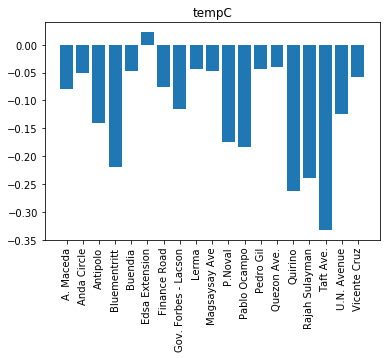

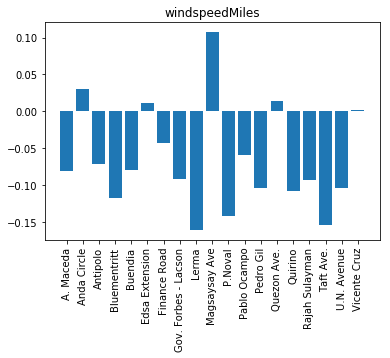

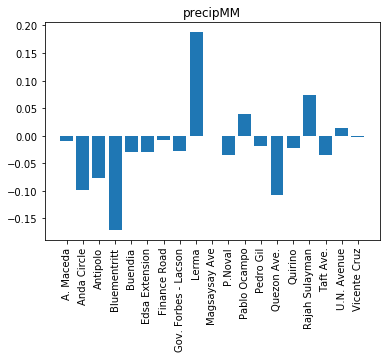

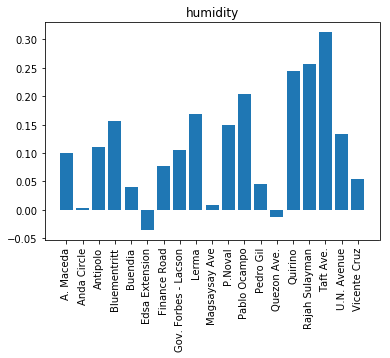

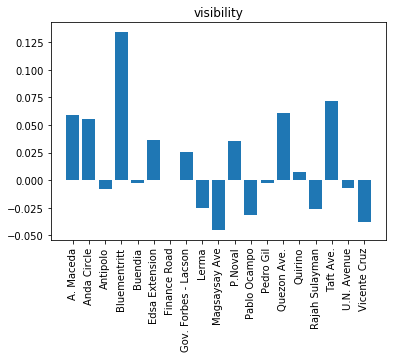

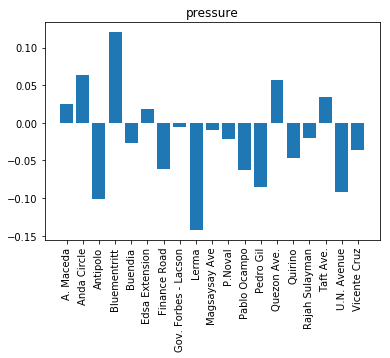

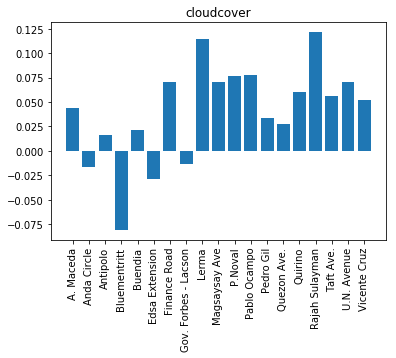

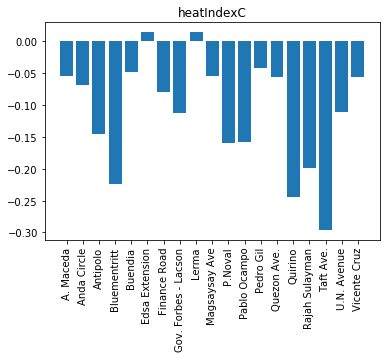

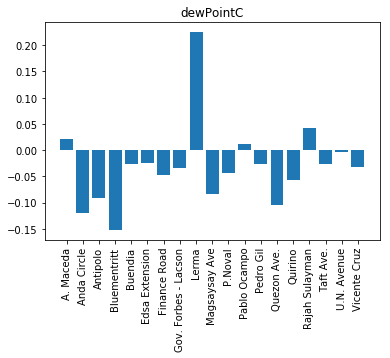

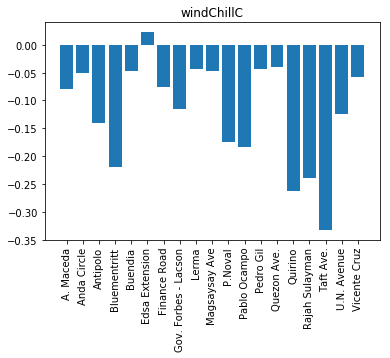

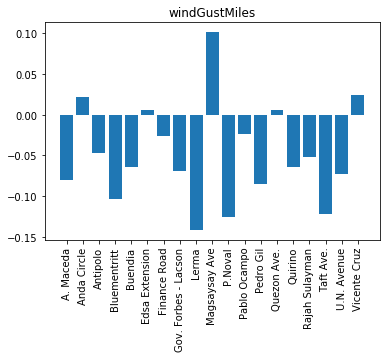

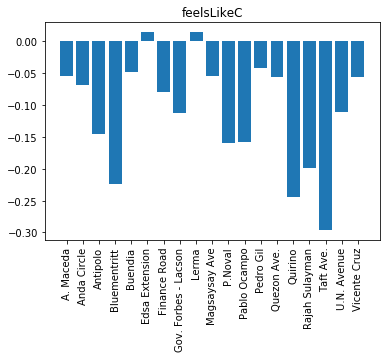

In [7]:
y = []
FEATURES = ROADS_SB_C[0].columns
for f in range(3, len(ROADS_SB_C[0].columns)): 
    y = []
    for r in ROADS_SB_C:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.title(ROADS_SB_C[0].columns[f])
    plt.xticks(rotation='vertical')
    plt.show()


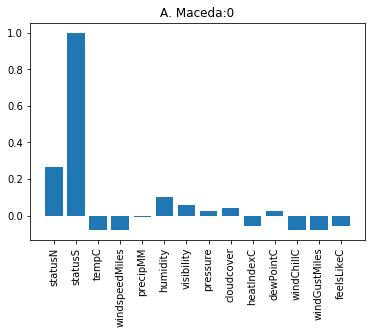

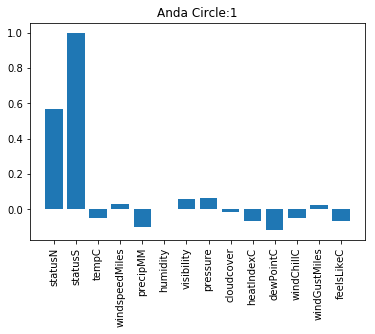

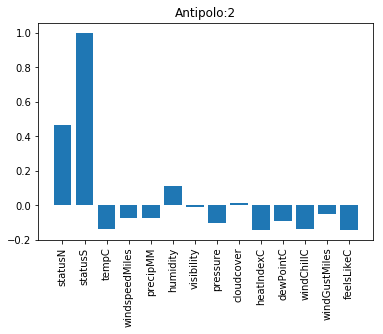

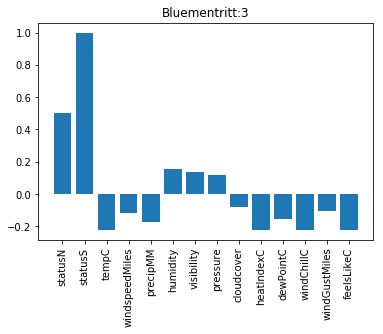

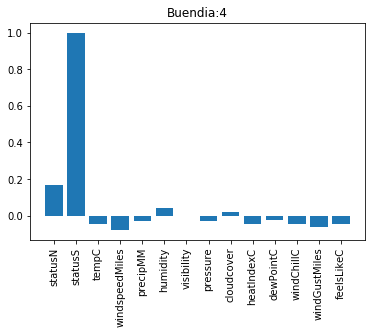

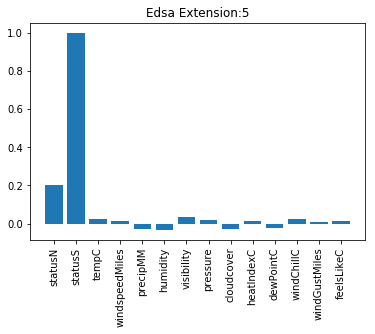

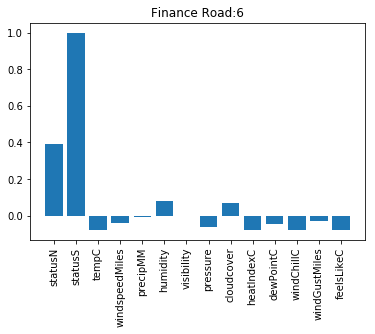

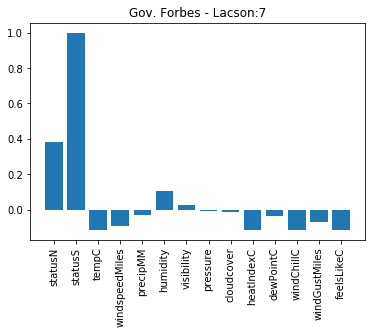

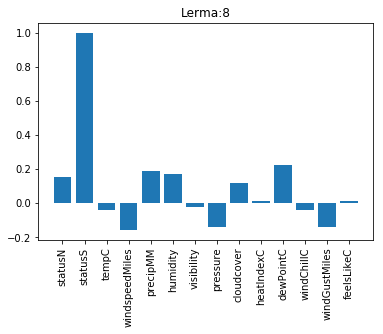

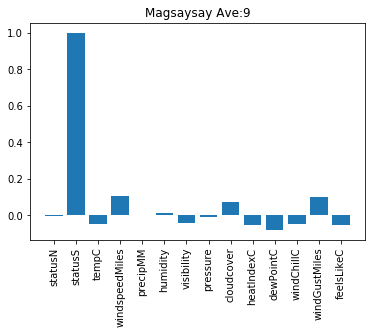

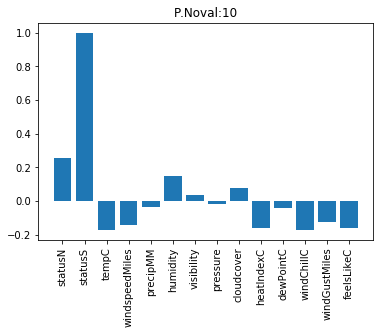

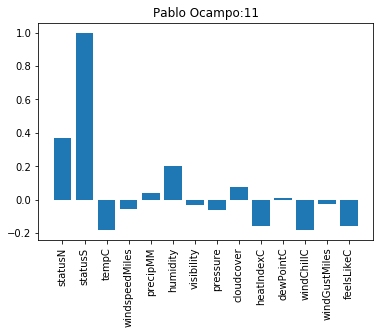

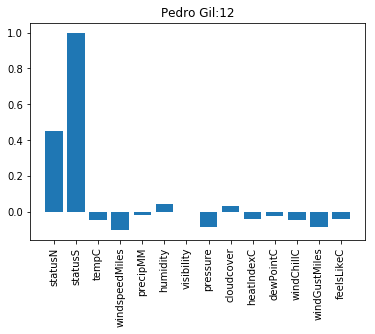

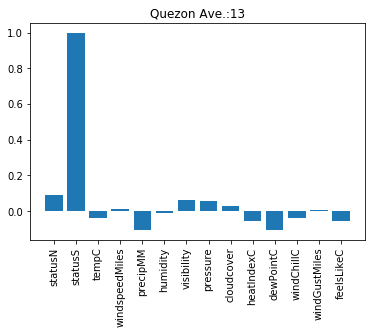

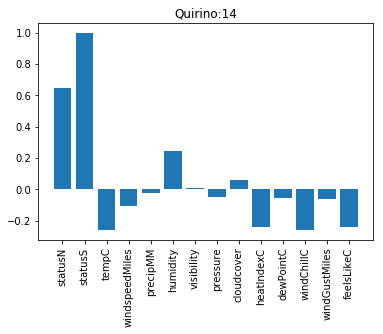

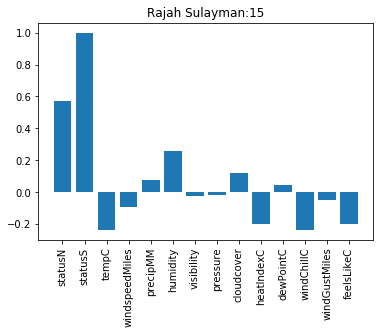

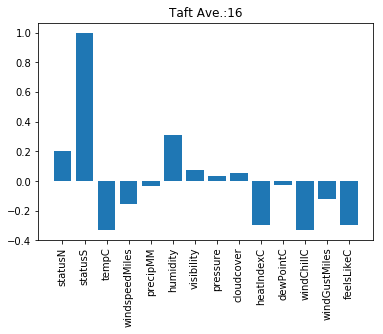

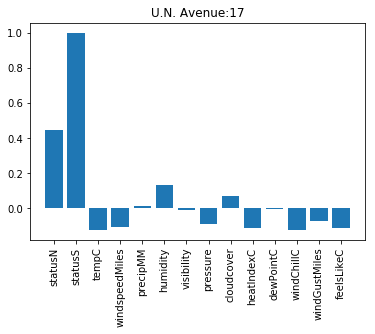

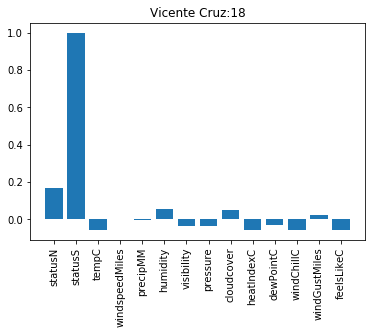

In [8]:
# for W=1
for r in range(len(ROADS_1)): 
    y = []
    for f in range(1, len(ROADS_SB_C[r].columns)):
        y.append(ROADS_SB_C[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_1[r] + ":" + str(r))

    plt.show()

<br><br><br>
## NON-ROLLING - NORTHBOUND

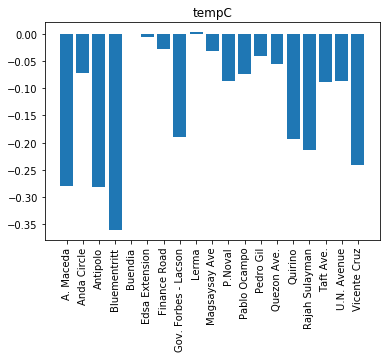

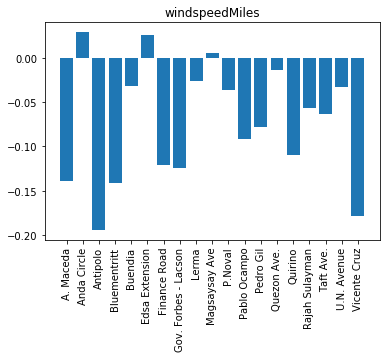

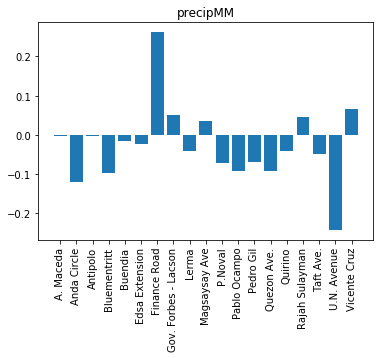

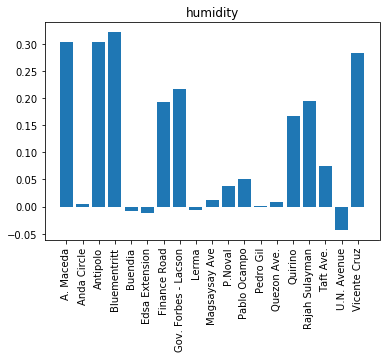

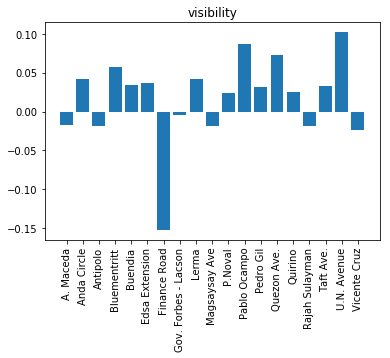

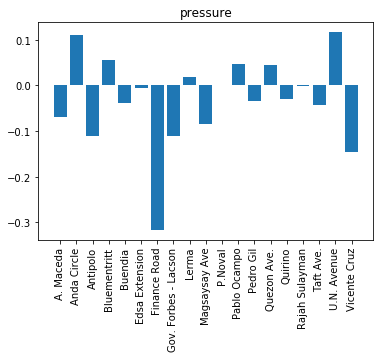

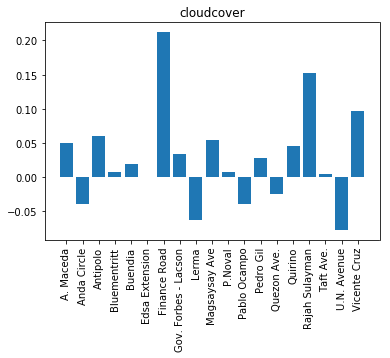

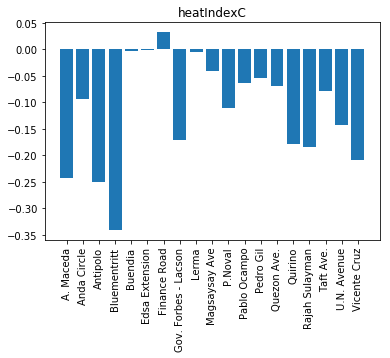

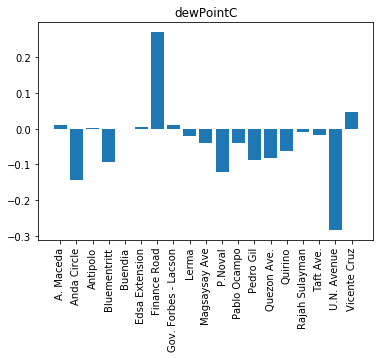

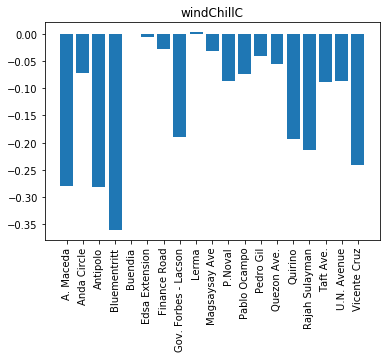

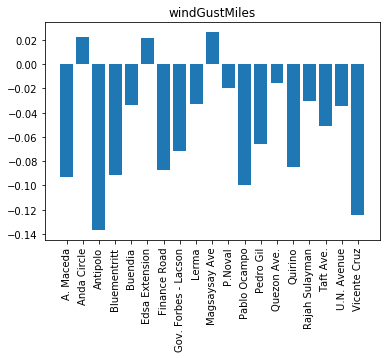

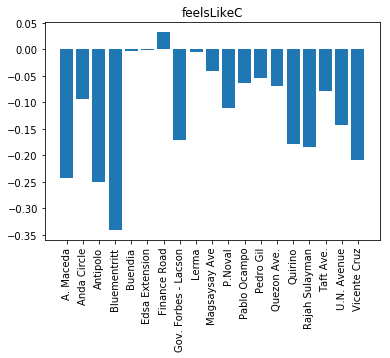

In [9]:
y = []
FEATURES = ROADS_NB_C[0].columns
for f in range(3, len(ROADS_NB_C[0].columns)): 
    y = []
    for r in ROADS_NB_C:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.title(ROADS_NB_C[0].columns[f])
    plt.xticks(rotation='vertical')
    plt.show()


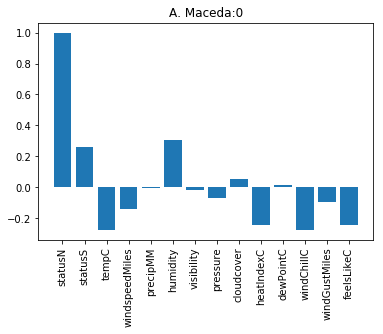

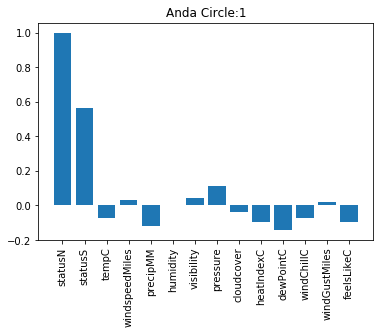

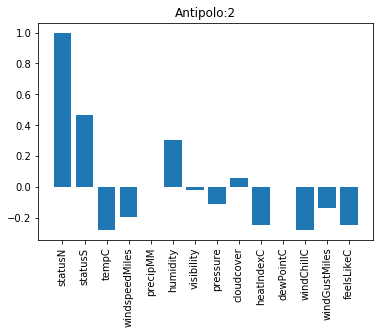

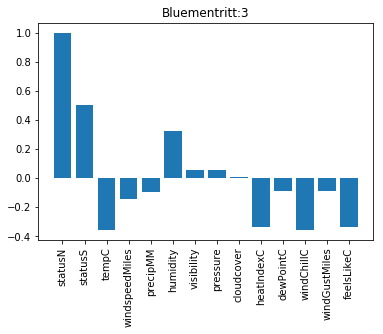

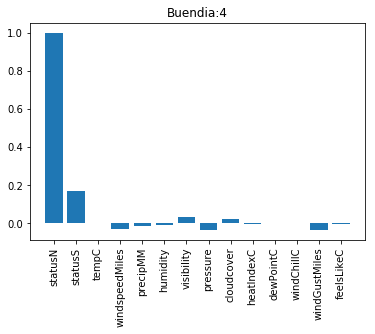

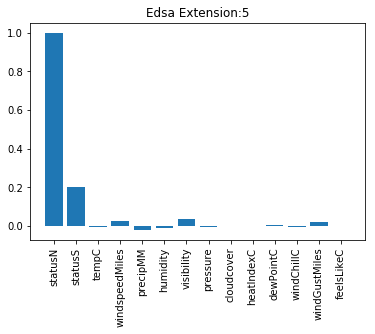

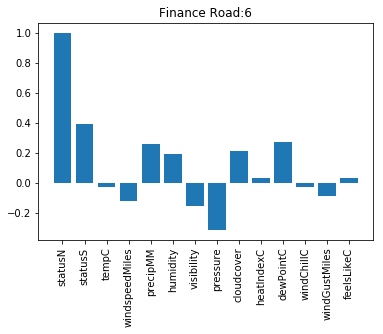

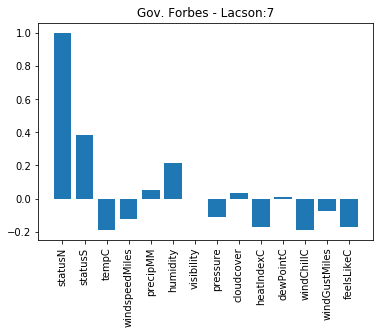

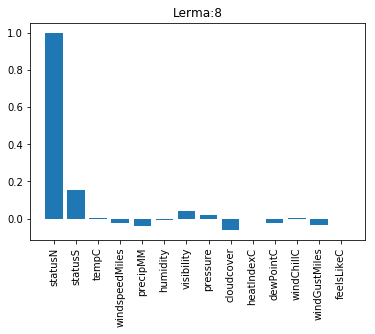

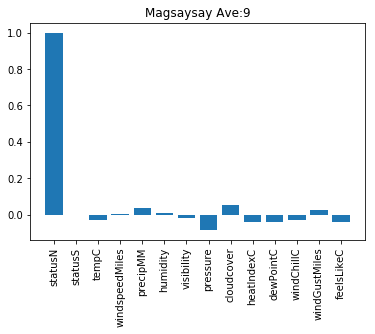

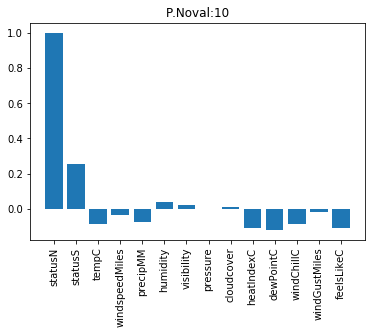

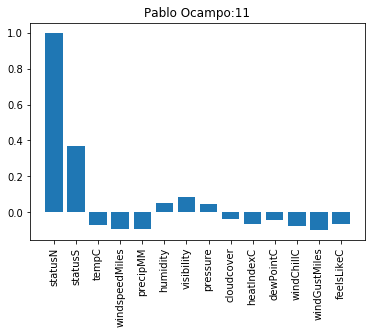

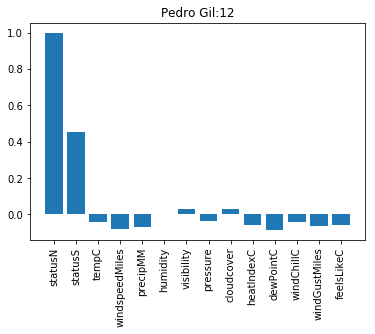

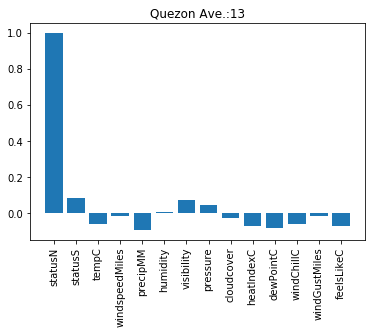

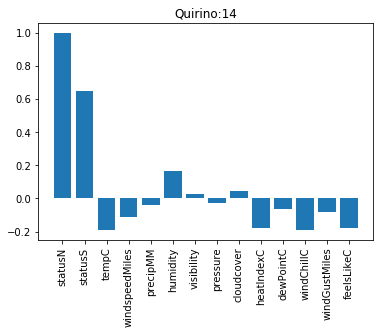

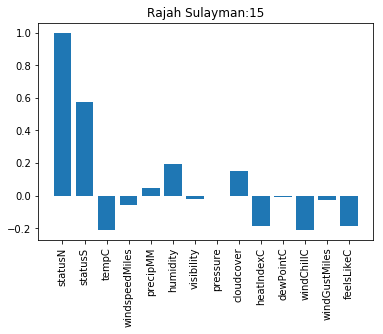

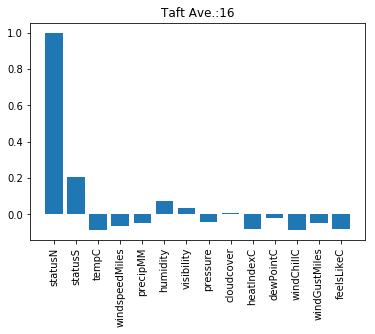

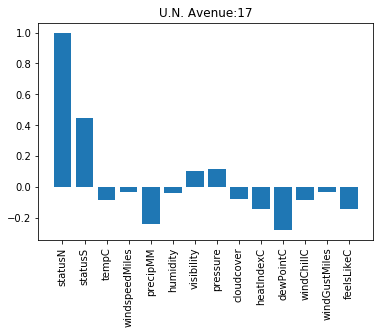

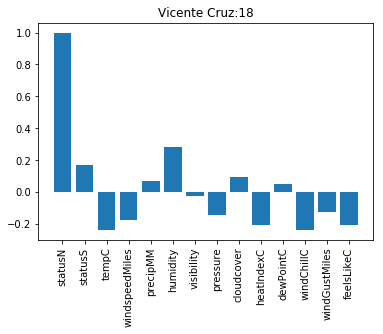

In [10]:
# for W=1
for r in range(len(ROADS_1)): 
    y = []
    for f in range(1, len(ROADS_NB_C[r].columns)):
        y.append(ROADS_NB_C[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_1[r] + ":" + str(r))

    plt.show()

<br><br><br>
# Rolling

In [11]:
CORR_R = []
for r in range(len(ROADS_1)):
    if DATASET_DIVISION == "transformed":
        df = pd.read_csv(DATASET_DIR + "rolling_" + DATASET_DIVISION + "/" 
                         "rolling-" + DATASET_DIVISION + "_" + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                         skipinitialspace=True)
        df = df.rename(columns={df.columns[0]:"Features"})
        CORR_R.append(df)

In [12]:
CORR_R[0].head()

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
0,statusN,1.000000,0.262680,0.989989,0.256206,0.986748,0.255871,0.987007,0.257115,0.971999,...,0.041187,0.030255,-0.060881,-0.106274,0.036232,0.017149,0.065834,-0.001158,0.021575,0.017149
1,statusS,0.262680,1.000000,0.269048,0.990489,0.272123,0.985720,0.264673,0.985882,0.276788,...,0.039899,0.118979,-0.021417,0.001166,0.051961,-0.028631,0.064815,-0.074150,0.034907,-0.028631
2,statusN_Rmean=2,0.989989,0.269048,1.000000,0.263008,0.992667,0.262699,0.990967,0.263901,0.991042,...,0.041409,0.029654,-0.060618,-0.106337,0.037050,0.016764,0.065825,-0.001384,0.022254,0.016764
3,statusS_Rmean=2,0.256206,0.990489,0.263008,1.000000,0.266161,0.991105,0.258523,0.989934,0.271188,...,0.040263,0.118987,-0.020952,0.000468,0.052086,-0.028299,0.065185,-0.074000,0.035688,-0.028299
4,statusN_Rmin=2,0.986748,0.272123,0.992667,0.266161,1.000000,0.266402,0.976174,0.266384,0.987208,...,0.043438,0.030084,-0.064752,-0.106607,0.039689,0.014595,0.066910,-0.003624,0.027779,0.014595


In [13]:
WINDOWS = [2,3,4,8,12,24,32,48,96]
FEATURES = CORR_NR[0].columns

In [14]:
ROADS_SB_CR = []
ROADS_NB_CR = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_R[r].loc[[feature]]  
    ROADS_NB_CR.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_R[r].loc[[feature]]  
    ROADS_SB_CR.append(df)    

<br>
## ROLLING - SOUTHBOUND

In [15]:
rMean = []
for w in WINDOWS:
    rMeanColumns = []
    window = w
    #Figuring out what columns are rolling mean
    for c in range(len(CORR_R[0].columns)):
        col = ROADS_SB_CR[0].columns[c]
        for f in FEATURES:
            if((f+"_Rmean=" + str(window)) == col):
                rMeanColumns.append(c)
    rMean.append(rMeanColumns)

In [16]:
ROADS_SB_CR[0]

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
1,statusS,0.26268,1.0,0.269048,0.990489,0.272123,0.98572,0.264673,0.985882,0.276788,...,0.039899,0.118979,-0.021417,0.001166,0.051961,-0.028631,0.064815,-0.07415,0.034907,-0.028631


#### One Graph = All Features of Window w of Road r

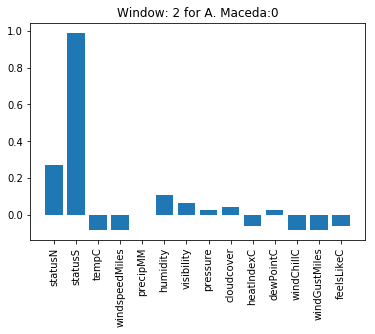

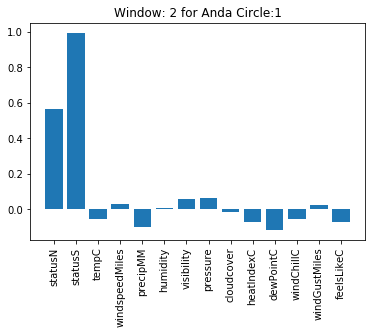

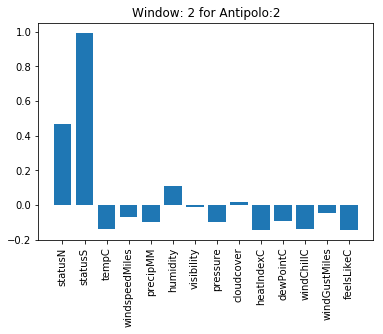

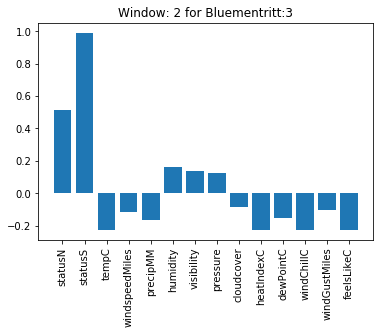

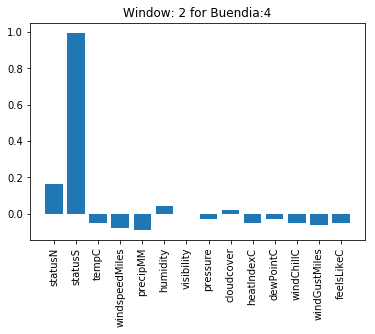

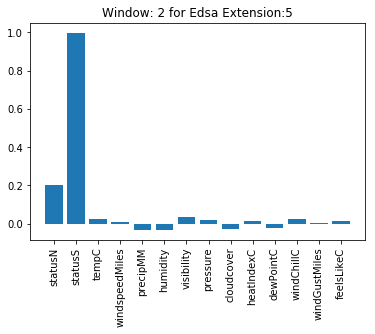

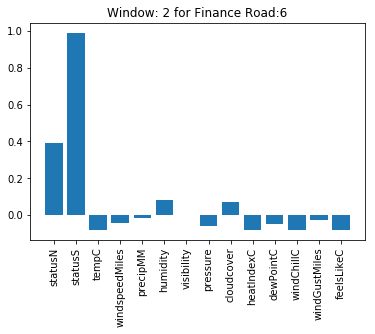

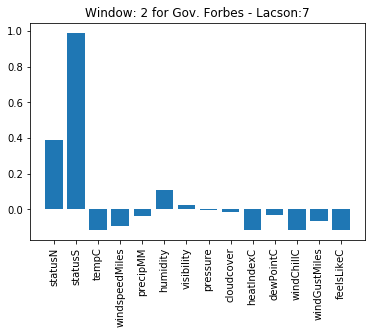

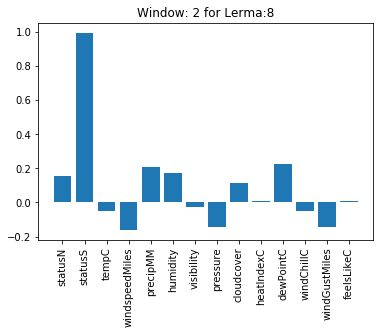

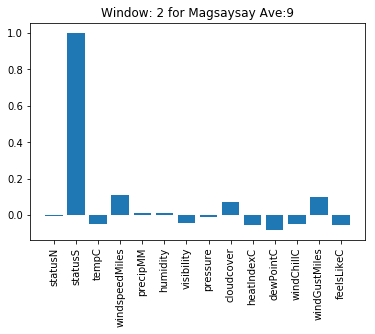

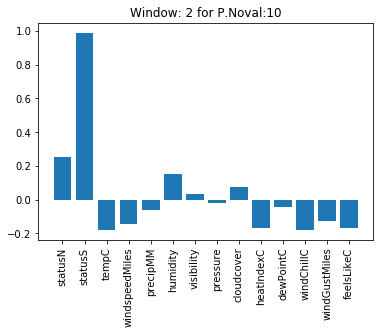

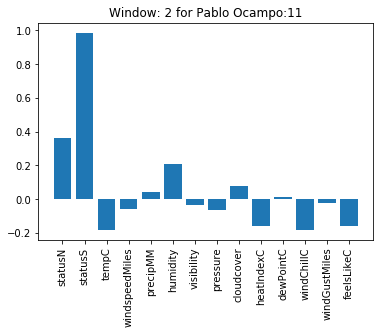

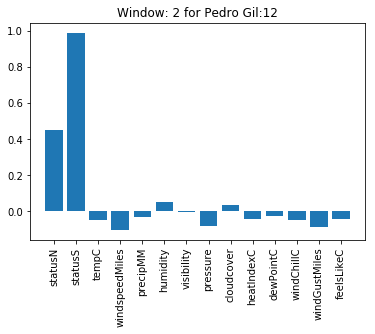

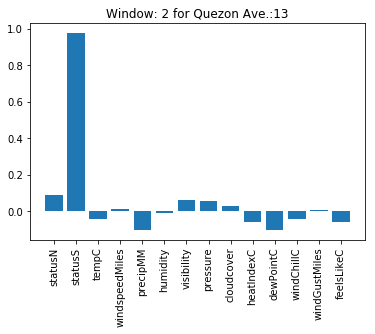

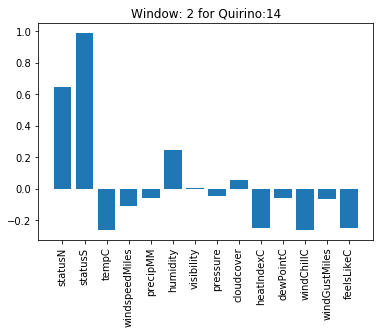

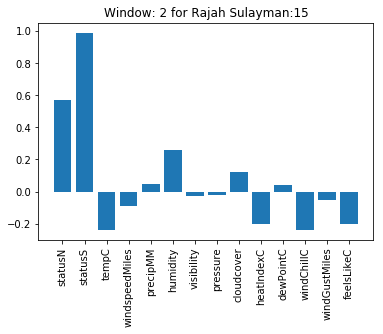

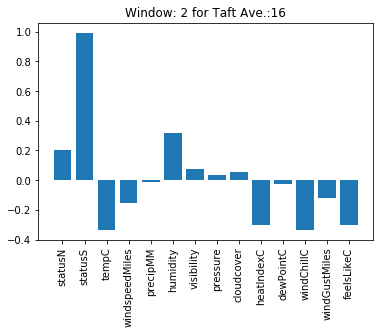

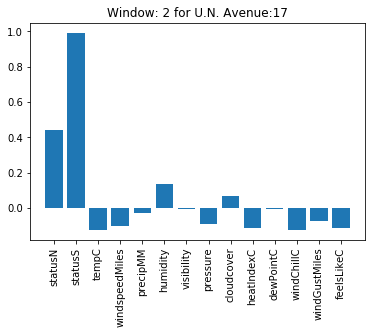

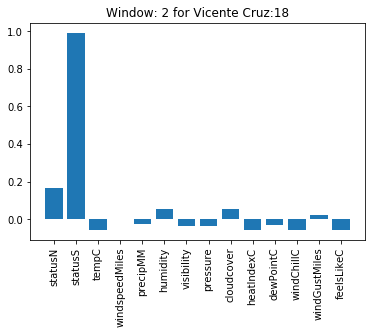

In [17]:
# for W=1
w = 0

for r in range(len(ROADS_1)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title("Window: " + str(WINDOWS[w]) + " for " + ROADS_1[r] + ":" + str(r))

    plt.show()

#### All Graph = Road r.  One Graph = Window of All Features

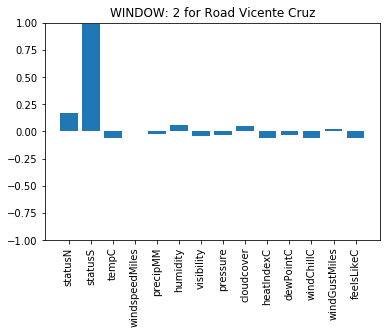

Max for WINDOW 2:0.059413814906688935



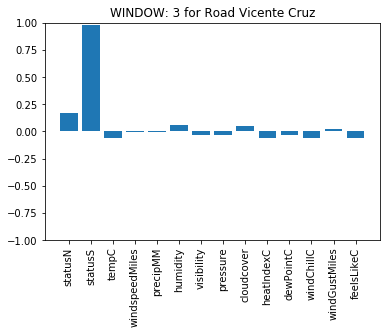

Max for WINDOW 3:0.062010336374863084



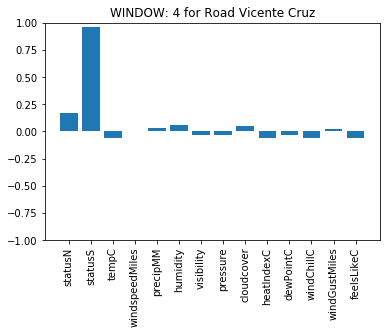

Max for WINDOW 4:0.06019320297667461



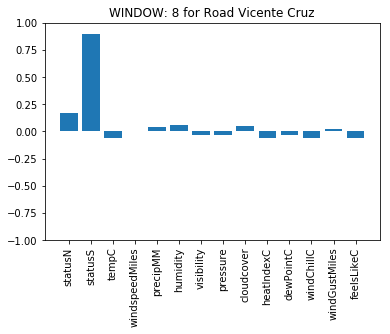

Max for WINDOW 8:0.06332397265329426



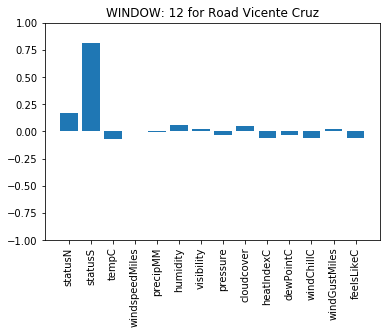

Max for WINDOW 12:0.06486155078277413



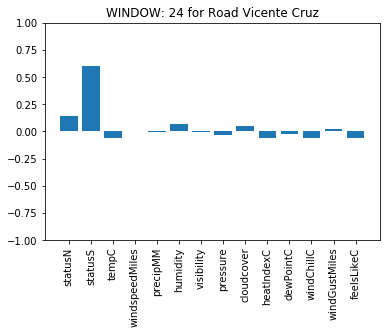

Max for WINDOW 24:0.0652878985798388



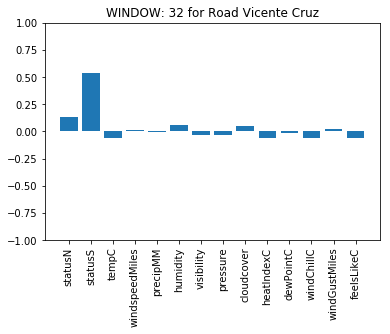

Max for WINDOW 32:0.06217769280373516



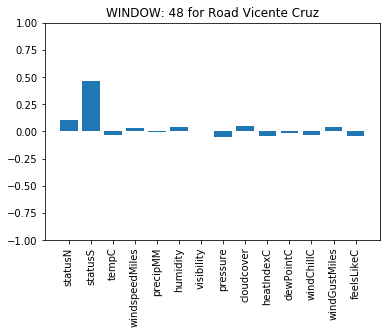

Max for WINDOW 48:0.05002779434352742



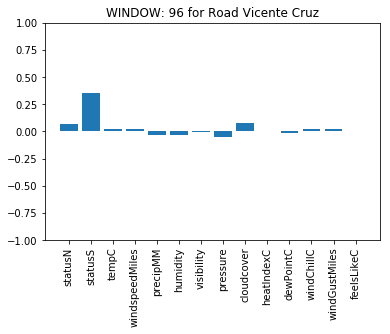

Max for WINDOW 96:0.07855733366388425
Max: 0.07855733366388425
Found in Window: 96


In [18]:
r = 18

maxes = []

fig, ax = plt.subplots()
yGroup = []
fin = False
for w in range(len(WINDOWS)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    print()
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.ylim(ymin=-1, ymax=1)
    plt.title("WINDOW: " + str(WINDOWS[w]) + " for Road " + ROADS_1[r])    
    plt.show()
        
    print("Max for WINDOW " + str(WINDOWS[w]) + ":" + str(np.absolute(y[2:]).max()))
    maxes.append(np.absolute(y[2:]).max())
    
print("===============")
print("Max: " + str(np.amax(maxes)))
print("Found in Window: " + str(WINDOWS[np.argmax(maxes)]))

#### One Graph = One Feature of All Roads for Window w

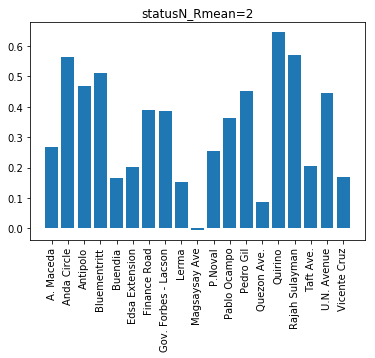

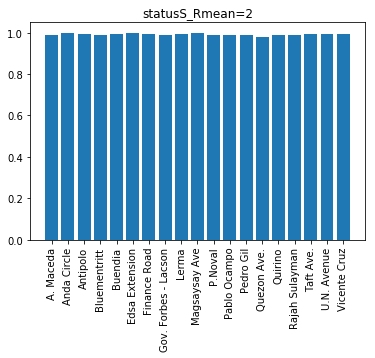

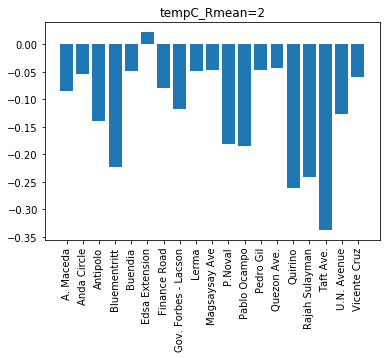

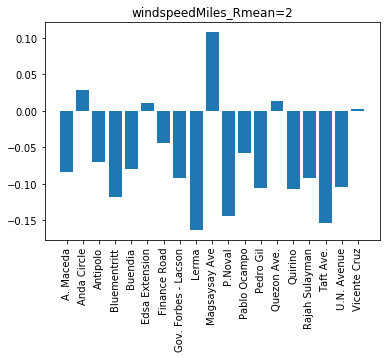

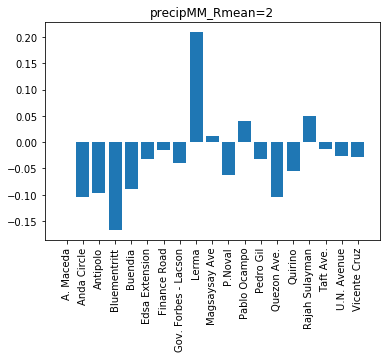

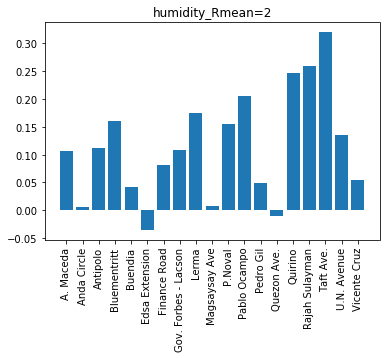

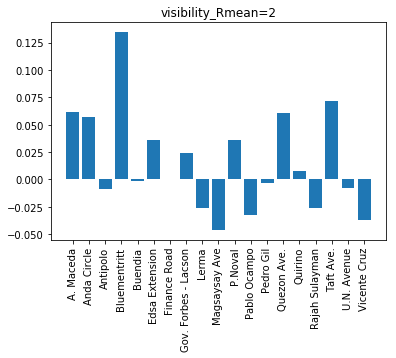

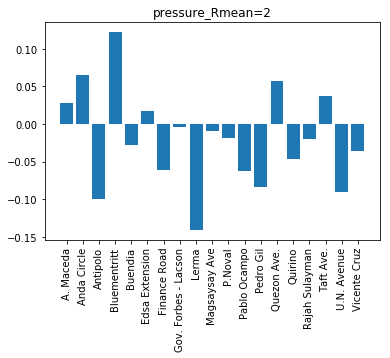

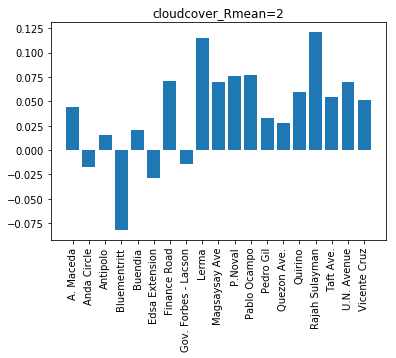

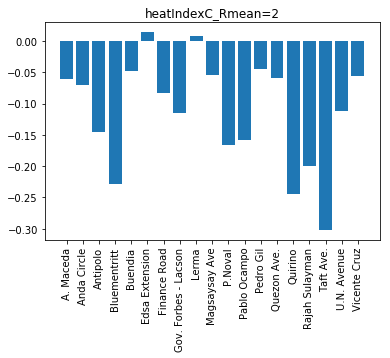

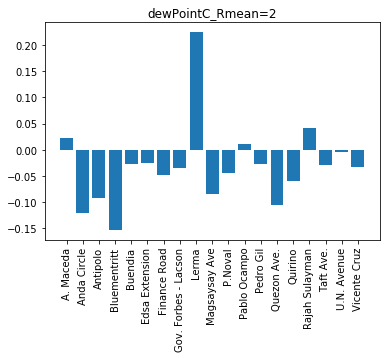

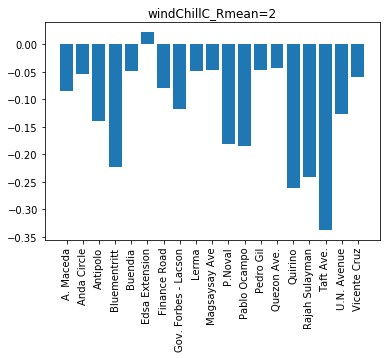

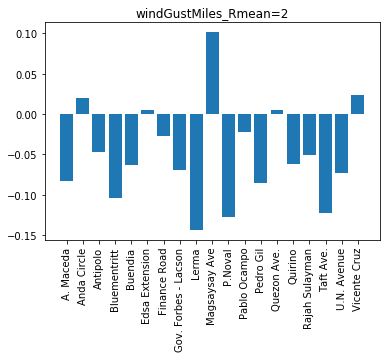

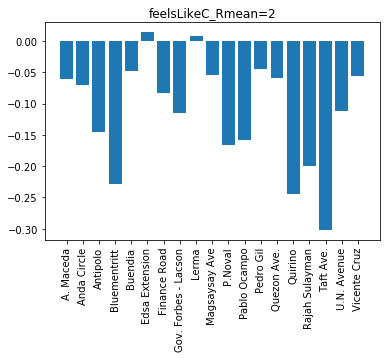

In [19]:
# for W=1
w = 0
r = 0
    
for f in range(3, len(ROADS_SB_CR[0].columns)): 
    y = []
    if f not in rMean[w]:
        continue
    for r in ROADS_SB_CR:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_SB_CR[0].columns[f])
    plt.show()

#### One Graph = One Feature for all Windows of all Roads

precipMM for Road: A. Maceda
precipMM_Rmean=2 : -2.024440204967543e-05 : 71
precipMM_Rmean=3 : -0.007018201777863503 : 107
precipMM_Rmean=4 : -0.019982281476730517 : 143
precipMM_Rmean=8 : -0.07506291478445125 : 179
precipMM_Rmean=12 : -0.016414825679032526 : 215
precipMM_Rmean=24 : -0.041873521796929214 : 251
precipMM_Rmean=32 : 0.0005131545319262405 : 287
precipMM_Rmean=48 : 0.027596579461395897 : 323
precipMM_Rmean=96 : 0.03911005467021839 : 359
Max for Road A. Maceda:0.07506291478445125


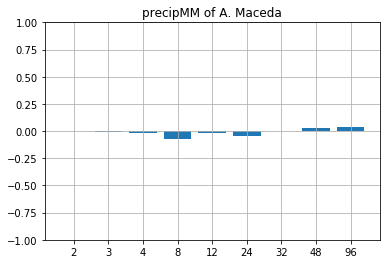

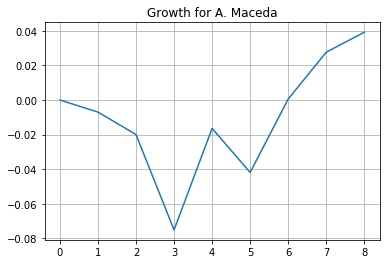

precipMM for Road: Anda Circle
precipMM_Rmean=2 : -0.10407247326170288 : 71
precipMM_Rmean=3 : -0.08365815427129185 : 107
precipMM_Rmean=4 : -0.06357239962545445 : 143
precipMM_Rmean=8 : -0.0507653021258563 : 179
precipMM_Rmean=12 : -0.08288353412629768 : 215
precipMM_Rmean=24 : -0.09365320909222156 : 251
precipMM_Rmean=32 : -0.08293690675246505 : 287
precipMM_Rmean=48 : -0.09638675853808833 : 323
precipMM_Rmean=96 : -0.14031406649286154 : 359
Max for Road Anda Circle:0.14031406649286154


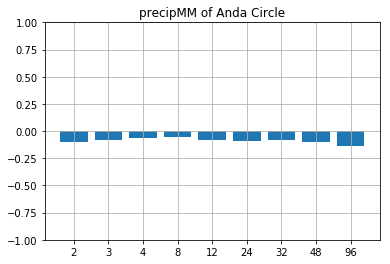

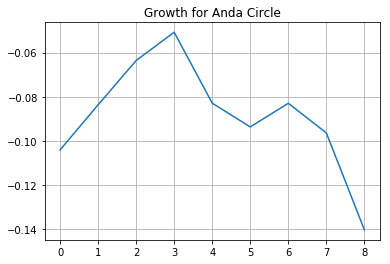

precipMM for Road: Antipolo
precipMM_Rmean=2 : -0.09780990007279383 : 71
precipMM_Rmean=3 : -0.08815978132287408 : 107
precipMM_Rmean=4 : -0.029170796358831567 : 143
precipMM_Rmean=8 : 0.07480732178275817 : 179
precipMM_Rmean=12 : -0.061258452276046274 : 215
precipMM_Rmean=24 : 0.010628544398268257 : 251
precipMM_Rmean=32 : -0.021616177917846358 : 287
precipMM_Rmean=48 : -0.013037201984786265 : 323
precipMM_Rmean=96 : -0.041341857172466176 : 359
Max for Road Antipolo:0.09780990007279383


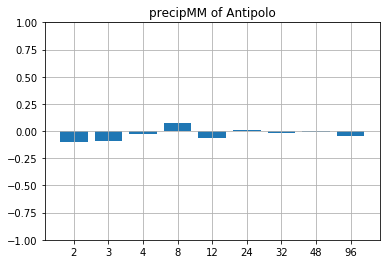

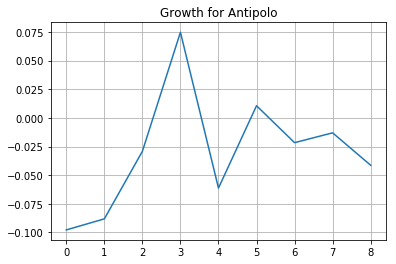

precipMM for Road: Bluementritt
precipMM_Rmean=2 : -0.16702471043227718 : 71
precipMM_Rmean=3 : -0.15663478487345306 : 107
precipMM_Rmean=4 : -0.16567724898993302 : 143
precipMM_Rmean=8 : -0.16989816190188 : 179
precipMM_Rmean=12 : -0.16603014313861794 : 215
precipMM_Rmean=24 : -0.13180694515829094 : 251
precipMM_Rmean=32 : -0.12265794687778205 : 287
precipMM_Rmean=48 : -0.1060231154178931 : 323
precipMM_Rmean=96 : -0.11838009518180095 : 359
Max for Road Bluementritt:0.16989816190188


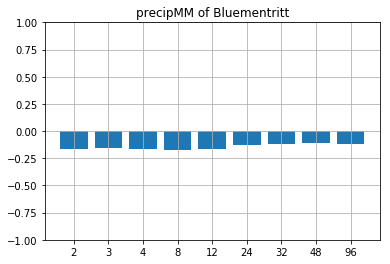

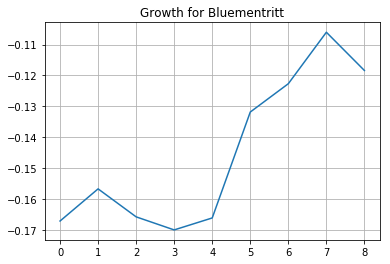

precipMM for Road: Buendia
precipMM_Rmean=2 : -0.09022793128184092 : 71
precipMM_Rmean=3 : -0.06269495443045314 : 107
precipMM_Rmean=4 : 0.006166395339384814 : 143
precipMM_Rmean=8 : 0.04485536743501662 : 179
precipMM_Rmean=12 : -0.04150910446038487 : 215
precipMM_Rmean=24 : -0.04328769669789557 : 251
precipMM_Rmean=32 : -0.0698347673839536 : 287
precipMM_Rmean=48 : -0.05764073341949709 : 323
precipMM_Rmean=96 : -0.08050794649381918 : 359
Max for Road Buendia:0.09022793128184092


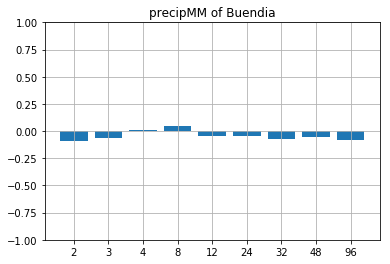

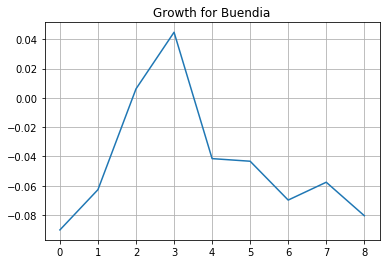

precipMM for Road: Edsa Extension
precipMM_Rmean=2 : -0.03193289265599155 : 71
precipMM_Rmean=3 : -0.021682263380592245 : 107
precipMM_Rmean=4 : -0.02439097251582584 : 143
precipMM_Rmean=8 : 0.003092966381304216 : 179
precipMM_Rmean=12 : -0.01023166777927116 : 215
precipMM_Rmean=24 : -0.01954895697598384 : 251
precipMM_Rmean=32 : -0.037588381822259063 : 287
precipMM_Rmean=48 : -0.034935170547083456 : 323
precipMM_Rmean=96 : -0.01686658022867534 : 359
Max for Road Edsa Extension:0.037588381822259063


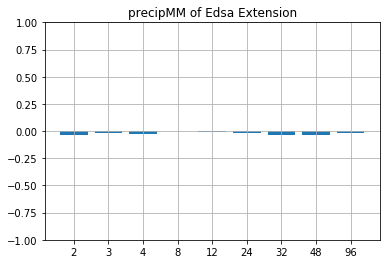

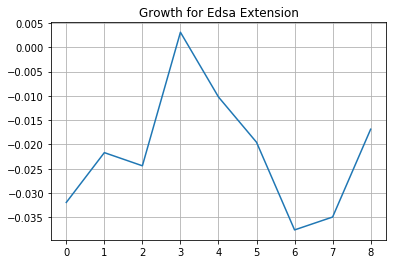

precipMM for Road: Finance Road
precipMM_Rmean=2 : -0.014750783957077785 : 71
precipMM_Rmean=3 : 0.010097759196822455 : 107
precipMM_Rmean=4 : 0.06158708945810563 : 143
precipMM_Rmean=8 : 0.080372688766552 : 179
precipMM_Rmean=12 : 0.02439669212377792 : 215
precipMM_Rmean=24 : 0.014645683001272797 : 251
precipMM_Rmean=32 : 0.03989905550686376 : 287
precipMM_Rmean=48 : 0.0257317539152677 : 323
precipMM_Rmean=96 : -0.03571326860284084 : 359
Max for Road Finance Road:0.080372688766552


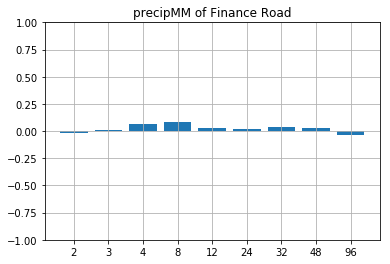

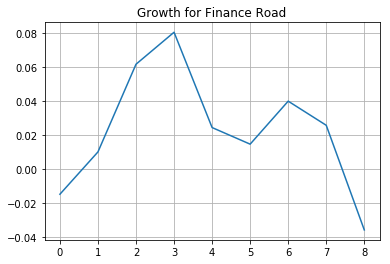

precipMM for Road: Gov. Forbes - Lacson
precipMM_Rmean=2 : -0.040294549138029885 : 71
precipMM_Rmean=3 : -0.035993311809885783 : 107
precipMM_Rmean=4 : -0.02152254996617381 : 143
precipMM_Rmean=8 : -0.03410214157410537 : 179
precipMM_Rmean=12 : -0.036414707536183234 : 215
precipMM_Rmean=24 : -0.031731980682158614 : 251
precipMM_Rmean=32 : -0.017290789255494817 : 287
precipMM_Rmean=48 : 0.0030808019527197553 : 323
precipMM_Rmean=96 : -0.02101731679850206 : 359
Max for Road Gov. Forbes - Lacson:0.040294549138029885


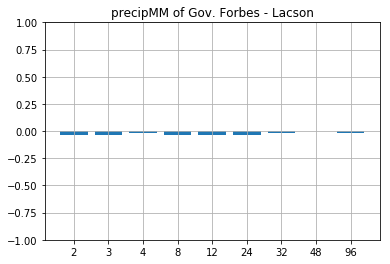

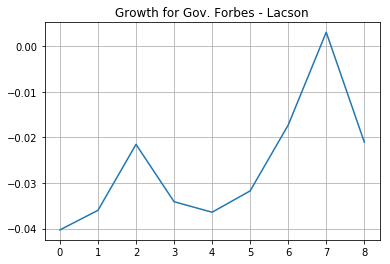

precipMM for Road: Lerma
precipMM_Rmean=2 : 0.20924918490104533 : 71
precipMM_Rmean=3 : 0.17996268739186774 : 107
precipMM_Rmean=4 : 0.1617830837879252 : 143
precipMM_Rmean=8 : 0.025565709608962917 : 179
precipMM_Rmean=12 : 0.16469234588660364 : 215
precipMM_Rmean=24 : 0.07273042783440051 : 251
precipMM_Rmean=32 : 0.16957771519618428 : 287
precipMM_Rmean=48 : 0.2082385609890839 : 323
precipMM_Rmean=96 : 0.2059944664886154 : 359
Max for Road Lerma:0.20924918490104533


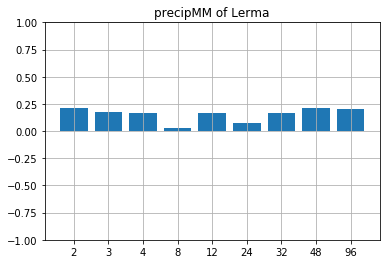

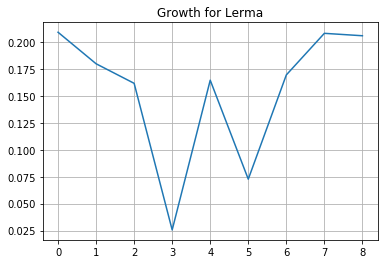

precipMM for Road: Magsaysay Ave
precipMM_Rmean=2 : 0.011716491009935137 : 71
precipMM_Rmean=3 : 0.03831903306200751 : 107
precipMM_Rmean=4 : -0.01033026705197376 : 143
precipMM_Rmean=8 : -0.0017120685623370849 : 179
precipMM_Rmean=12 : 0.001313956976860941 : 215
precipMM_Rmean=24 : 0.07029045097006692 : 251
precipMM_Rmean=32 : 0.05631786273304605 : 287
precipMM_Rmean=48 : 0.03997796389043366 : 323
precipMM_Rmean=96 : 0.033866995593270145 : 359
Max for Road Magsaysay Ave:0.07029045097006692


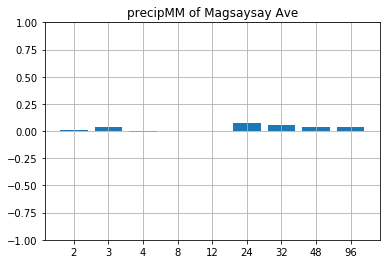

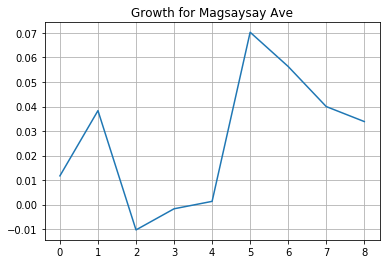

precipMM for Road: P.Noval
precipMM_Rmean=2 : -0.06231580871645755 : 71
precipMM_Rmean=3 : -0.05661168122234165 : 107
precipMM_Rmean=4 : -0.015528452817462547 : 143
precipMM_Rmean=8 : 0.013650381772963316 : 179
precipMM_Rmean=12 : -0.033229463447855566 : 215
precipMM_Rmean=24 : -0.01933995490413248 : 251
precipMM_Rmean=32 : -0.017521249022501656 : 287
precipMM_Rmean=48 : -0.004457691860711611 : 323
precipMM_Rmean=96 : -0.025738134722340843 : 359
Max for Road P.Noval:0.06231580871645755


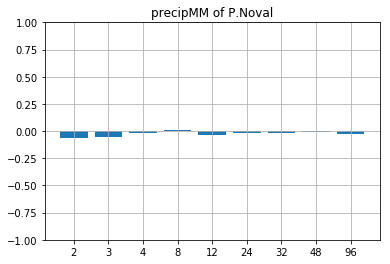

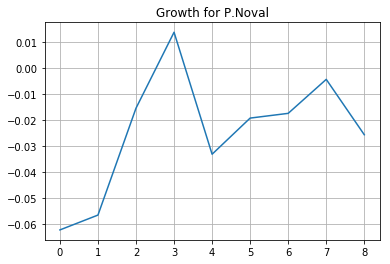

precipMM for Road: Pablo Ocampo
precipMM_Rmean=2 : 0.04054506524086867 : 71
precipMM_Rmean=3 : 0.02013568877730746 : 107
precipMM_Rmean=4 : 0.040268646707024285 : 143
precipMM_Rmean=8 : 0.013390104854277 : 179
precipMM_Rmean=12 : 0.03247756000839452 : 215
precipMM_Rmean=24 : 0.008840086359125785 : 251
precipMM_Rmean=32 : 0.06382198758306372 : 287
precipMM_Rmean=48 : 0.06382292598349014 : 323
precipMM_Rmean=96 : 0.015058092902686069 : 359
Max for Road Pablo Ocampo:0.06382292598349014


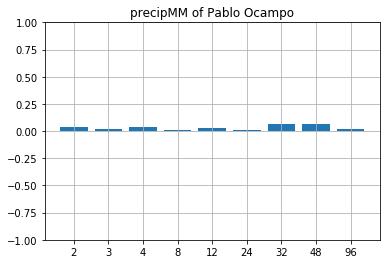

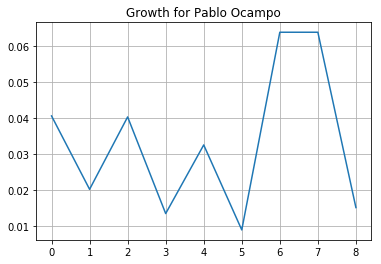

precipMM for Road: Pedro Gil
precipMM_Rmean=2 : -0.03159979776659344 : 71
precipMM_Rmean=3 : -0.0412431956566492 : 107
precipMM_Rmean=4 : 0.008188112609681738 : 143
precipMM_Rmean=8 : 0.0877211417102336 : 179
precipMM_Rmean=12 : -0.02133902968190545 : 215
precipMM_Rmean=24 : 0.02765711398146955 : 251
precipMM_Rmean=32 : 0.020299518523812825 : 287
precipMM_Rmean=48 : 0.0248194196707859 : 323
precipMM_Rmean=96 : 0.008377068094889703 : 359
Max for Road Pedro Gil:0.0877211417102336


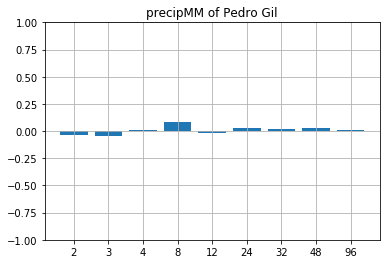

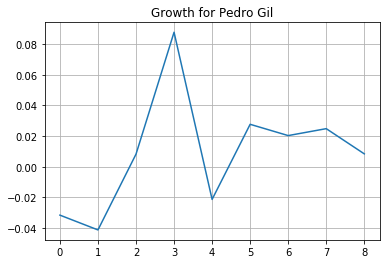

precipMM for Road: Quezon Ave.
precipMM_Rmean=2 : -0.10529372215764217 : 71
precipMM_Rmean=3 : -0.10249384035132507 : 107
precipMM_Rmean=4 : -0.09692543760527933 : 143
precipMM_Rmean=8 : -0.05312447395533092 : 179
precipMM_Rmean=12 : -0.08816492511315217 : 215
precipMM_Rmean=24 : -0.04483558109874049 : 251
precipMM_Rmean=32 : -0.06642690341927032 : 287
precipMM_Rmean=48 : -0.061002535639918073 : 323
precipMM_Rmean=96 : -0.059251153531896375 : 359
Max for Road Quezon Ave.:0.10529372215764217


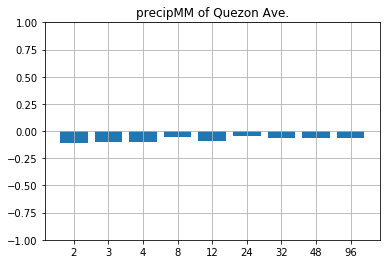

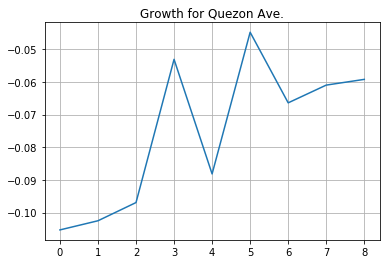

precipMM for Road: Quirino
precipMM_Rmean=2 : -0.05466448408941734 : 71
precipMM_Rmean=3 : -0.054535824626298766 : 107
precipMM_Rmean=4 : -0.002381919921415181 : 143
precipMM_Rmean=8 : -0.03841960009320625 : 179
precipMM_Rmean=12 : -0.05498215783348382 : 215
precipMM_Rmean=24 : -0.050702300571803284 : 251
precipMM_Rmean=32 : -0.017395180325736538 : 287
precipMM_Rmean=48 : -0.007720463062809715 : 323
precipMM_Rmean=96 : -0.07846030704166128 : 359
Max for Road Quirino:0.07846030704166128


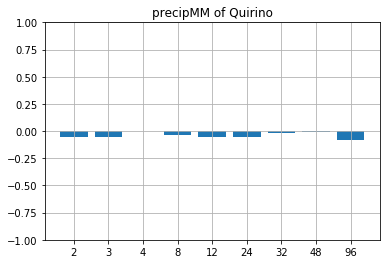

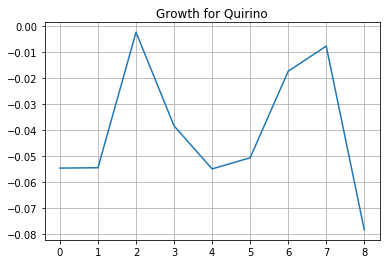

precipMM for Road: Rajah Sulayman
precipMM_Rmean=2 : 0.049676466447214934 : 71
precipMM_Rmean=3 : 0.04934246636367291 : 107
precipMM_Rmean=4 : 0.0632740357911164 : 143
precipMM_Rmean=8 : -0.01866492504030026 : 179
precipMM_Rmean=12 : 0.05524653793387568 : 215
precipMM_Rmean=24 : 0.022088481588999242 : 251
precipMM_Rmean=32 : 0.05496281632570801 : 287
precipMM_Rmean=48 : 0.06438242510678316 : 323
precipMM_Rmean=96 : 0.04795923099447715 : 359
Max for Road Rajah Sulayman:0.06438242510678316


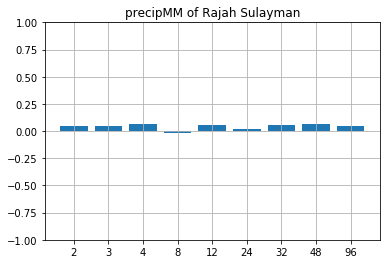

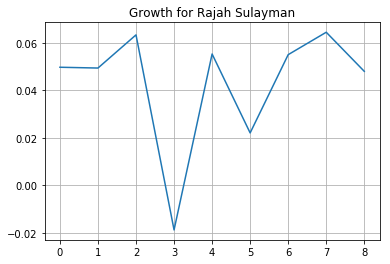

precipMM for Road: Taft Ave.
precipMM_Rmean=2 : -0.013669173861844916 : 71
precipMM_Rmean=3 : -0.02701030753169089 : 107
precipMM_Rmean=4 : -0.05285586357042425 : 143
precipMM_Rmean=8 : -0.12369085087883758 : 179
precipMM_Rmean=12 : -0.031434036778031346 : 215
precipMM_Rmean=24 : -0.048624201017403564 : 251
precipMM_Rmean=32 : 0.014945381345240415 : 287
precipMM_Rmean=48 : 0.03962237860268098 : 323
precipMM_Rmean=96 : 0.020541408005491958 : 359
Max for Road Taft Ave.:0.12369085087883758


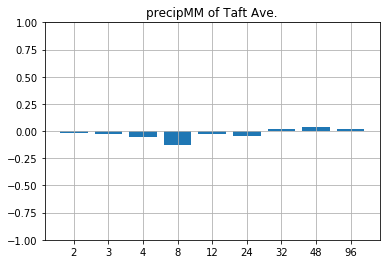

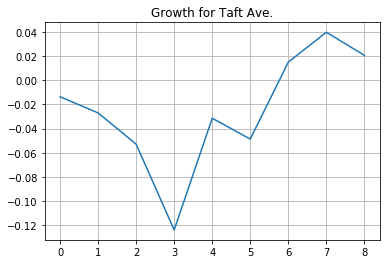

precipMM for Road: U.N. Avenue
precipMM_Rmean=2 : -0.027156440887666663 : 71
precipMM_Rmean=3 : -0.08042958845577314 : 107
precipMM_Rmean=4 : -0.014720924313311652 : 143
precipMM_Rmean=8 : 0.06255480069353637 : 179
precipMM_Rmean=12 : -0.03825925850325259 : 215
precipMM_Rmean=24 : 0.047075122485864825 : 251
precipMM_Rmean=32 : 0.007349096041385031 : 287
precipMM_Rmean=48 : 0.044845375009026266 : 323
precipMM_Rmean=96 : 0.023863009495539773 : 359
Max for Road U.N. Avenue:0.08042958845577314


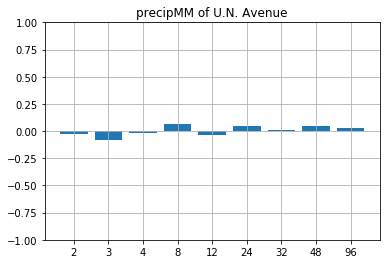

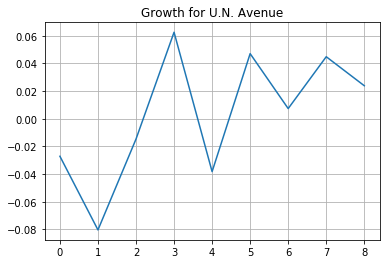

precipMM for Road: Vicente Cruz
precipMM_Rmean=2 : -0.02799943821026785 : 71
precipMM_Rmean=3 : -0.008628583942060078 : 107
precipMM_Rmean=4 : 0.028936751763090095 : 143
precipMM_Rmean=8 : 0.03755649140776615 : 179
precipMM_Rmean=12 : -0.005956898812848535 : 215
precipMM_Rmean=24 : -0.008148811052341947 : 251
precipMM_Rmean=32 : -0.00084331787965422 : 287
precipMM_Rmean=48 : -0.00041619523898266987 : 323
precipMM_Rmean=96 : -0.03439955046887019 : 359
Max for Road Vicente Cruz:0.03755649140776615


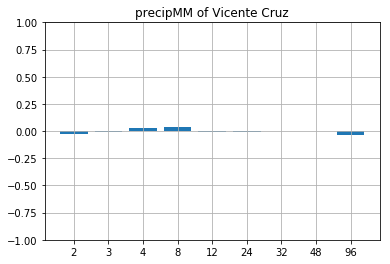

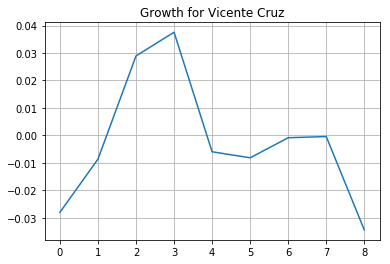

In [20]:
w = 0
r = 0
feature = 'precipMM'
y = []

for r in range(len(ROADS_1)):
    y = []
    print(feature + " for Road: " + ROADS_1[r])
    for w in range(len(WINDOWS)):
        for f in range(3, len(ROADS_SB_CR[r].columns)): 
            if f not in rMean[w]:
                continue
            elif feature not in ROADS_SB_CR[r].columns[f]:
                continue
            print(str(ROADS_SB_CR[r].columns[f]) + " : " + str(ROADS_SB_CR[r].iloc[0, f]) + " : " + str(f))
            y.append(ROADS_SB_CR[r].iloc[0, f])
            
    print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
    plt.bar(np.arange(len(WINDOWS)), y)
    plt.ylim(ymax=1, ymin=-1)
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.grid()
    plt.title(feature + " of " + ROADS_1[r])
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.title("Growth for " + ROADS_1[r])

    plt.show()

<br><br><br>
## ROLLING - NORTHBOUND

In [21]:
rMean = []
for w in WINDOWS:
    rMeanColumns = []
    window = w
    #Figuring out what columns are rolling mean
    for c in range(len(CORR_R[0].columns)):
        col = ROADS_NB_CR[0].columns[c]
        for f in FEATURES:
            if((f+"_Rmean=" + str(window)) == col):
                rMeanColumns.append(c)
    rMean.append(rMeanColumns)

In [22]:
ROADS_NB_CR[0]

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
0,statusN,1.0,0.26268,0.989989,0.256206,0.986748,0.255871,0.987007,0.257115,0.971999,...,0.041187,0.030255,-0.060881,-0.106274,0.036232,0.017149,0.065834,-0.001158,0.021575,0.017149


#### One Graph = All Features of Window w of Road r

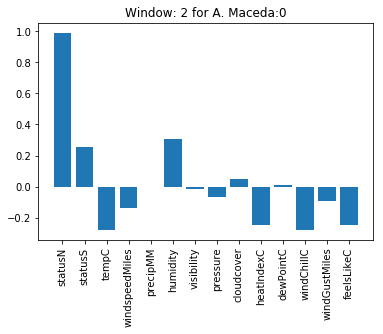

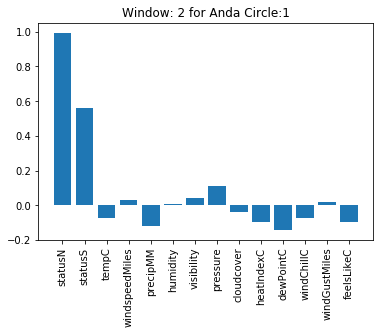

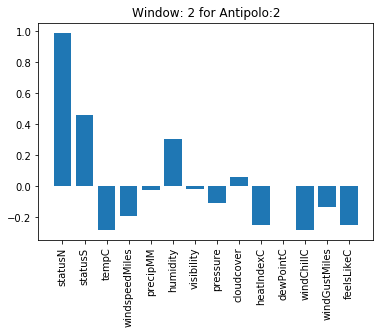

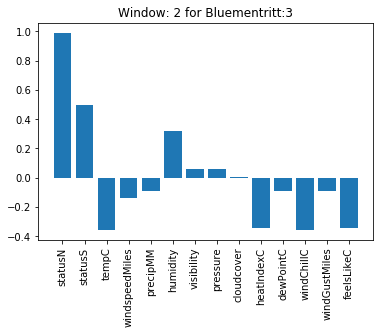

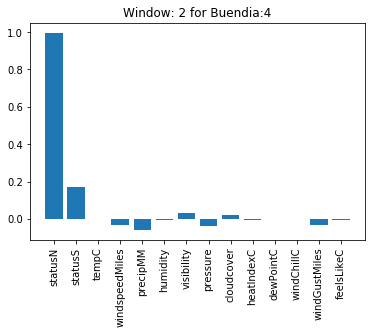

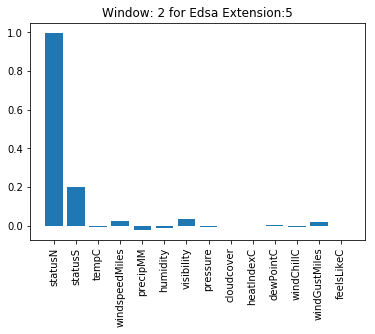

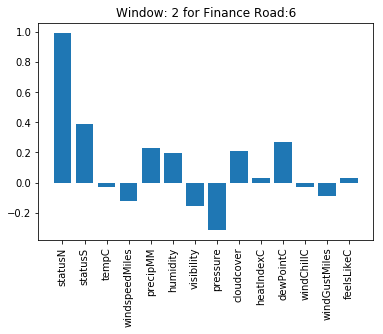

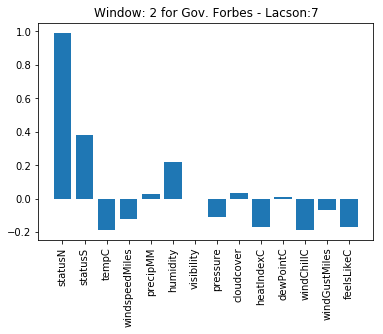

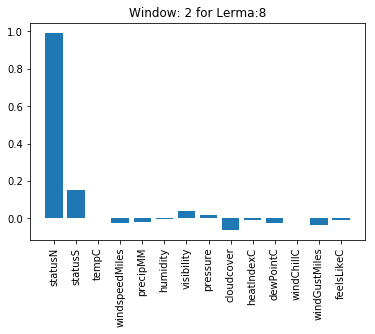

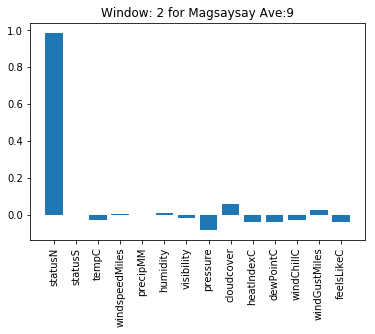

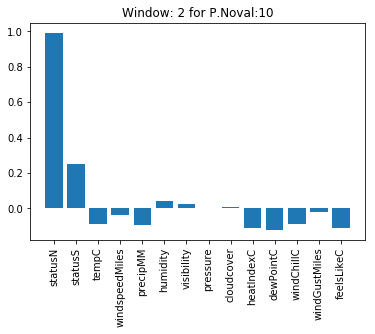

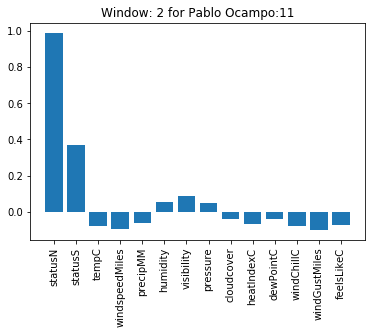

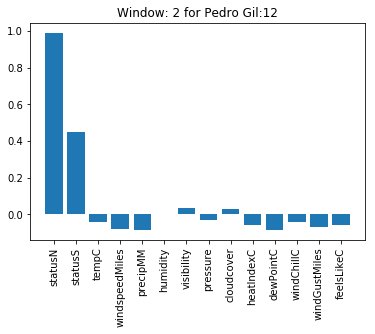

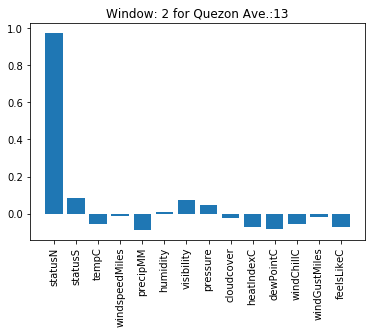

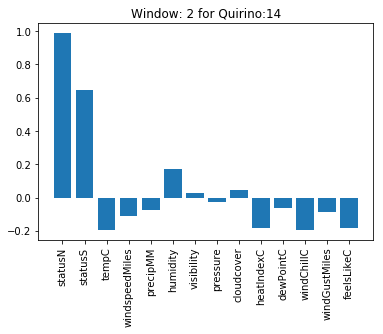

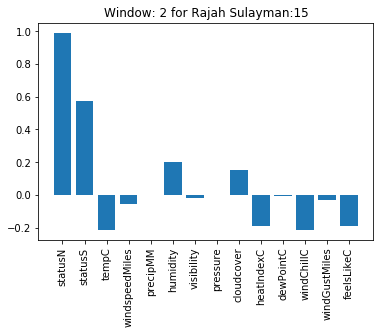

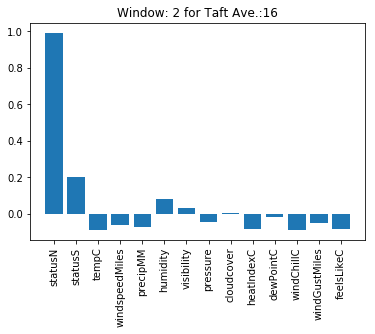

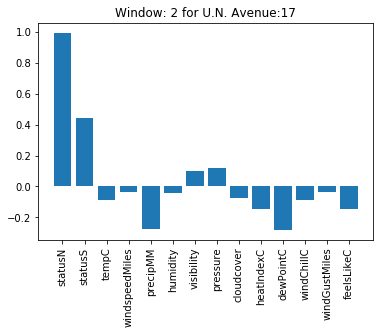

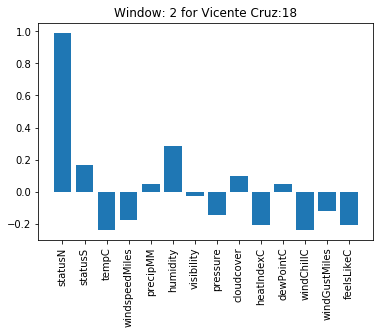

In [23]:
# for W=1
w = 0

for r in range(len(ROADS_1)): 
    y = []
    for f in range(3, len(ROADS_NB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_NB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title("Window: " + str(WINDOWS[w]) + " for " + ROADS_1[r] + ":" + str(r))

    plt.show()

#### All Graph = Road r.  One Graph = Window of All Features

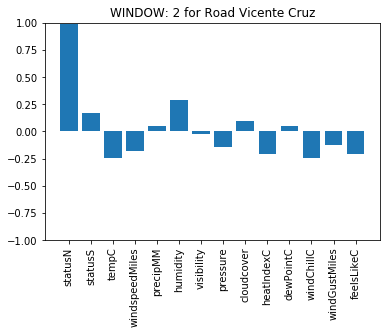

Max for WINDOW 2:0.28517144822049945



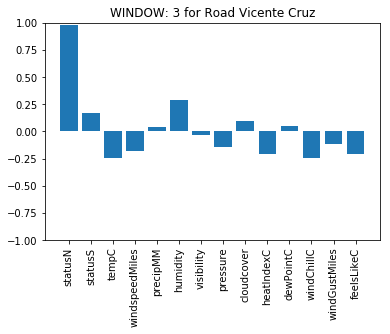

Max for WINDOW 3:0.28653452102506005



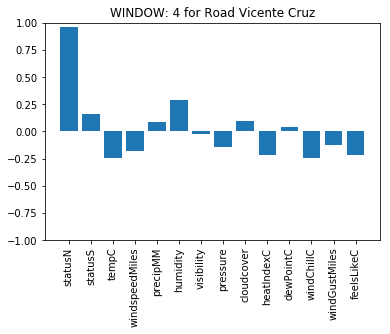

Max for WINDOW 4:0.2870966171095531



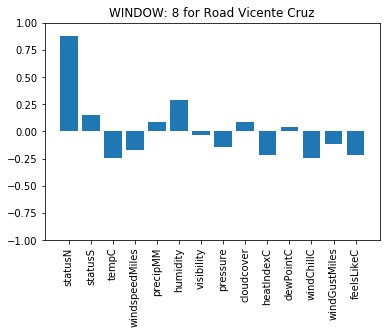

Max for WINDOW 8:0.28829730278432986



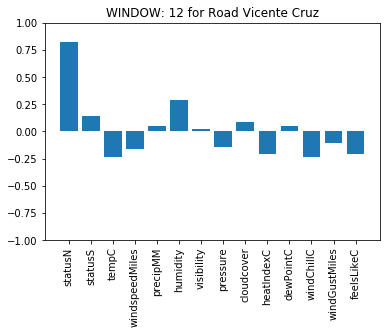

Max for WINDOW 12:0.28510778830523503



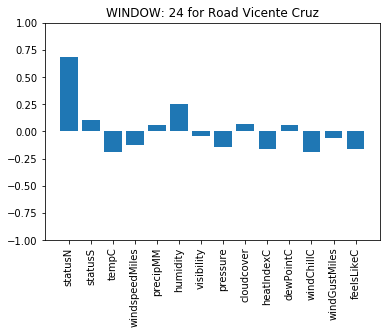

Max for WINDOW 24:0.2515789750367807



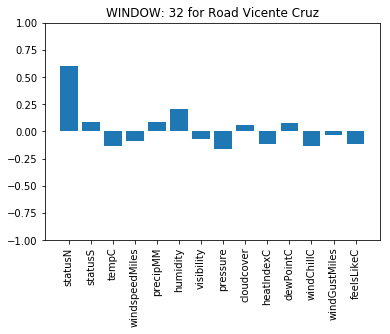

Max for WINDOW 32:0.20993913646989995



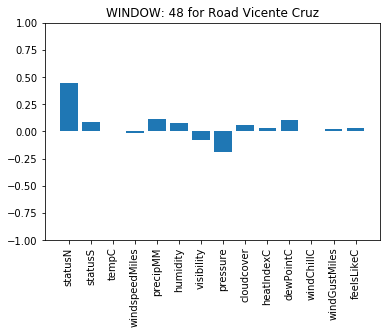

Max for WINDOW 48:0.18788321692203816



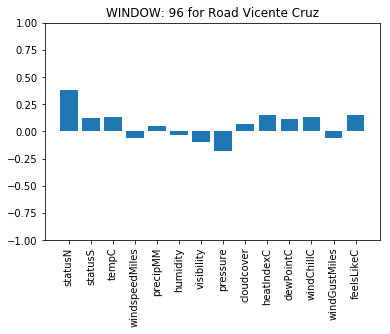

Max for WINDOW 96:0.1757168809103203
Max: 0.28829730278432986
Found in Window: 8


In [24]:
r = 18

maxes = []

fig, ax = plt.subplots()
yGroup = []
fin = False
for w in range(len(WINDOWS)): 
    y = []
    for f in range(3, len(ROADS_NB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_NB_CR[r].iloc[0, f])
    print()
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.ylim(ymin=-1, ymax=1)
    plt.title("WINDOW: " + str(WINDOWS[w]) + " for Road " + ROADS_1[r])    
    plt.show()
        
    print("Max for WINDOW " + str(WINDOWS[w]) + ":" + str(np.absolute(y[2:]).max()))
    maxes.append(np.absolute(y[2:]).max())
    
print("===============")
print("Max: " + str(np.amax(maxes)))
print("Found in Window: " + str(WINDOWS[np.argmax(maxes)]))

#### One Graph = One Feature of All Roads for Window w

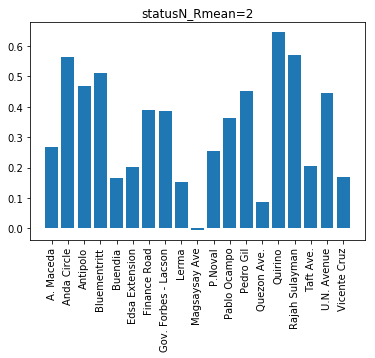

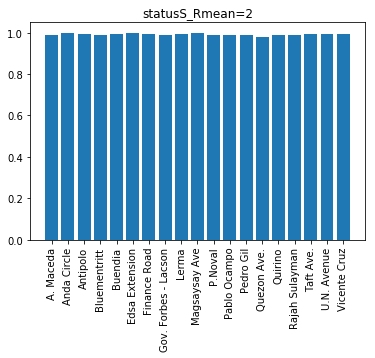

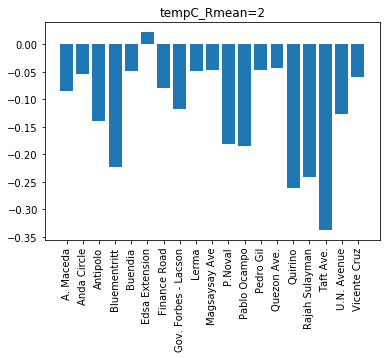

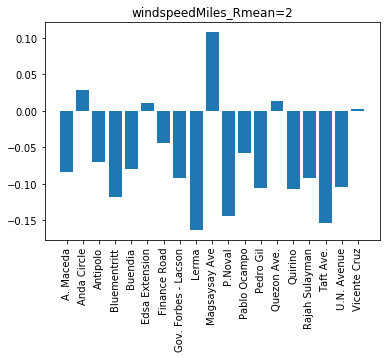

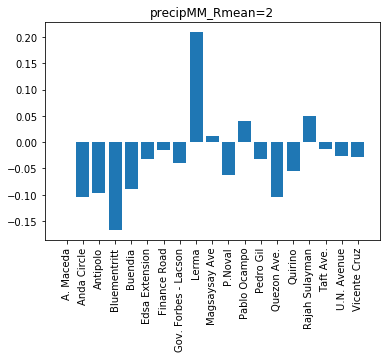

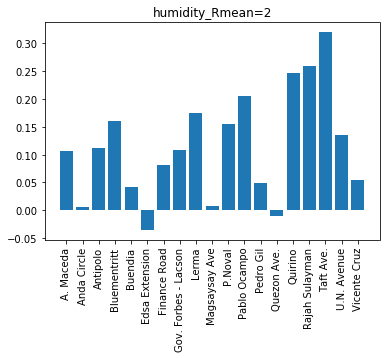

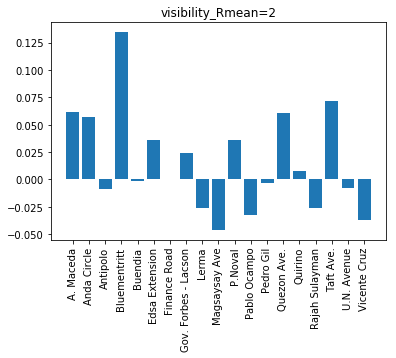

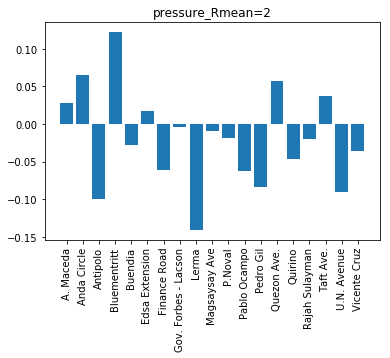

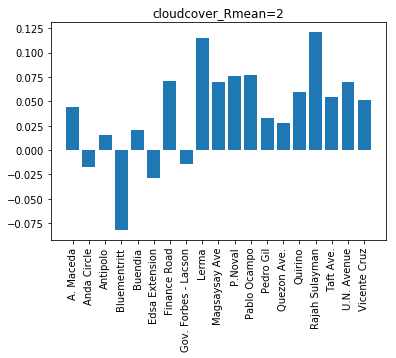

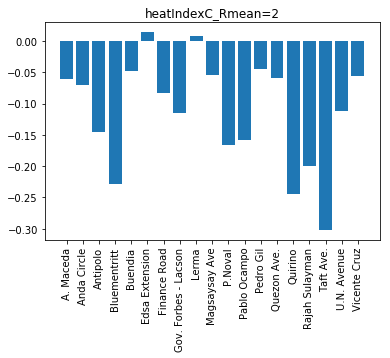

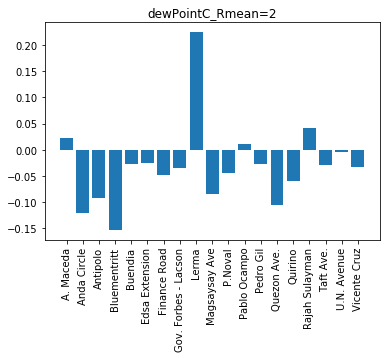

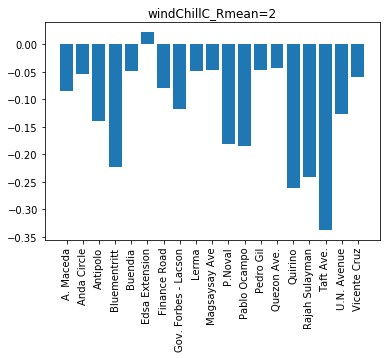

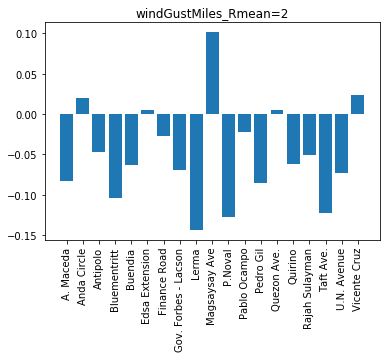

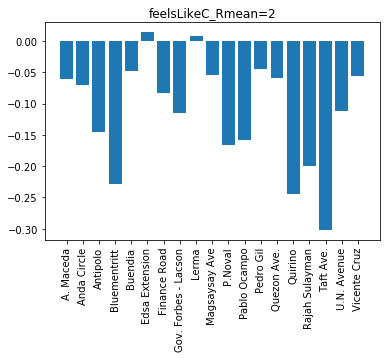

In [25]:
# for W=1
w = 0
r = 0
    
for f in range(3, len(ROADS_NB_CR[0].columns)): 
    y = []
    if f not in rMean[w]:
        continue
    for r in ROADS_SB_CR:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_NB_CR[0].columns[f])
    plt.show()

#### One Graph = One Feature for all Windows of all Roads

precipMM for Road: A. Maceda
precipMM_Rmean=2 : -0.005701008195048836 : 71
precipMM_Rmean=3 : -0.02892165420941495 : 107
precipMM_Rmean=4 : 0.010120743517341673 : 143
precipMM_Rmean=8 : 0.021329263658512808 : 179
precipMM_Rmean=12 : -0.003071642588593717 : 215
precipMM_Rmean=24 : 0.02808559998918895 : 251
precipMM_Rmean=32 : 0.05647077045380814 : 287
precipMM_Rmean=48 : 0.07669808965650361 : 323
precipMM_Rmean=96 : 0.04349011571412377 : 359
Max for Road A. Maceda:0.07669808965650361


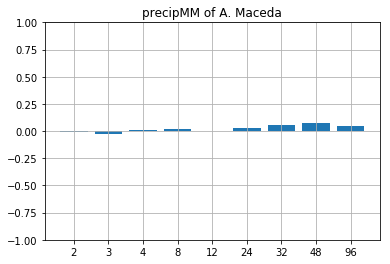

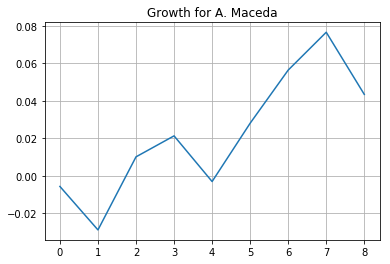

precipMM for Road: Anda Circle
precipMM_Rmean=2 : -0.11927049179651115 : 71
precipMM_Rmean=3 : -0.08067548171972838 : 107
precipMM_Rmean=4 : -0.07248984761013763 : 143
precipMM_Rmean=8 : -0.0918732994924484 : 179
precipMM_Rmean=12 : -0.09174199704672988 : 215
precipMM_Rmean=24 : -0.12001817813903695 : 251
precipMM_Rmean=32 : -0.08347639471562635 : 287
precipMM_Rmean=48 : -0.11752399594588975 : 323
precipMM_Rmean=96 : -0.17184121634398122 : 359
Max for Road Anda Circle:0.17184121634398122


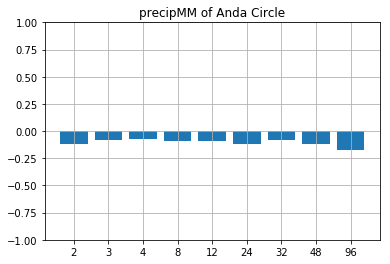

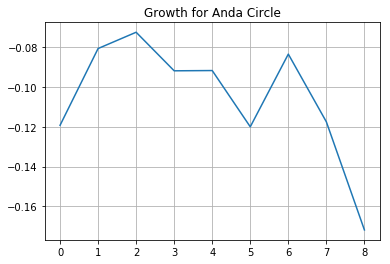

precipMM for Road: Antipolo
precipMM_Rmean=2 : -0.023008016419606092 : 71
precipMM_Rmean=3 : -0.030377370788325118 : 107
precipMM_Rmean=4 : 0.0331991063110694 : 143
precipMM_Rmean=8 : 0.0511125588610316 : 179
precipMM_Rmean=12 : -0.010657718715124151 : 215
precipMM_Rmean=24 : 0.0174041319914452 : 251
precipMM_Rmean=32 : 0.044044103162858235 : 287
precipMM_Rmean=48 : 0.0613271867876778 : 323
precipMM_Rmean=96 : 0.0017233802200716946 : 359
Max for Road Antipolo:0.0613271867876778


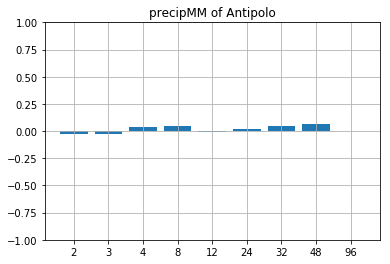

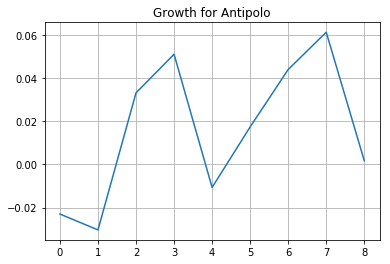

precipMM for Road: Bluementritt
precipMM_Rmean=2 : -0.09346582469212716 : 71
precipMM_Rmean=3 : -0.08623240946395917 : 107
precipMM_Rmean=4 : -0.08578250191877125 : 143
precipMM_Rmean=8 : -0.10163896636126082 : 179
precipMM_Rmean=12 : -0.07406323113799261 : 215
precipMM_Rmean=24 : -0.05067657103545169 : 251
precipMM_Rmean=32 : -0.024770455031819884 : 287
precipMM_Rmean=48 : -0.010777087615537351 : 323
precipMM_Rmean=96 : -0.04662479010014255 : 359
Max for Road Bluementritt:0.10163896636126082


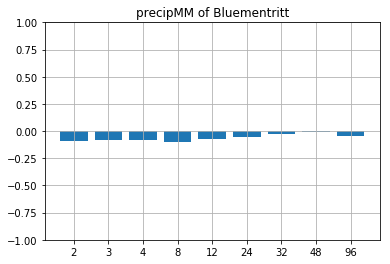

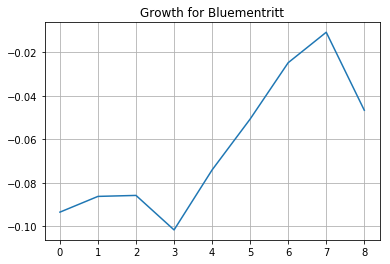

precipMM for Road: Buendia
precipMM_Rmean=2 : -0.06052350376441098 : 71
precipMM_Rmean=3 : -0.03741749778860575 : 107
precipMM_Rmean=4 : 0.0048278124737989505 : 143
precipMM_Rmean=8 : 0.0058905758301550475 : 179
precipMM_Rmean=12 : -0.0412726286145412 : 215
precipMM_Rmean=24 : -0.05301581054426885 : 251
precipMM_Rmean=32 : -0.0627954766582618 : 287
precipMM_Rmean=48 : -0.06774043470274085 : 323
precipMM_Rmean=96 : -0.08843443213188774 : 359
Max for Road Buendia:0.08843443213188774


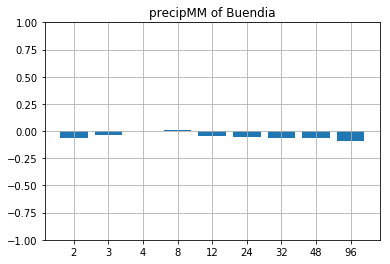

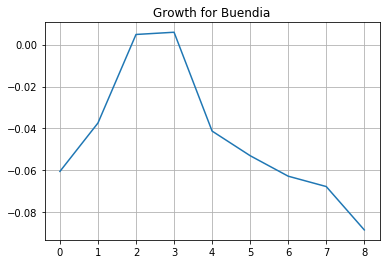

precipMM for Road: Edsa Extension
precipMM_Rmean=2 : -0.02380734232776581 : 71
precipMM_Rmean=3 : -0.028853204961624607 : 107
precipMM_Rmean=4 : -0.02870964346305866 : 143
precipMM_Rmean=8 : -0.02455483016117107 : 179
precipMM_Rmean=12 : -0.01968699633238257 : 215
precipMM_Rmean=24 : -0.021847243415387758 : 251
precipMM_Rmean=32 : -0.02555535450789344 : 287
precipMM_Rmean=48 : -0.026886135503060724 : 323
precipMM_Rmean=96 : 0.0020670946507971525 : 359
Max for Road Edsa Extension:0.028853204961624607


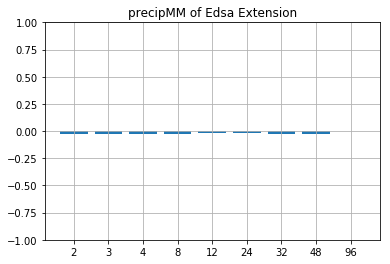

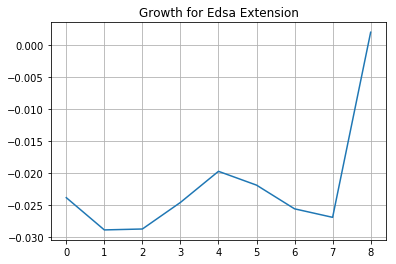

precipMM for Road: Finance Road
precipMM_Rmean=2 : 0.2309177367526401 : 71
precipMM_Rmean=3 : 0.1887184433058742 : 107
precipMM_Rmean=4 : 0.26178418371245965 : 143
precipMM_Rmean=8 : 0.2728847781962828 : 179
precipMM_Rmean=12 : 0.23430079369421405 : 215
precipMM_Rmean=24 : 0.24921333846542146 : 251
precipMM_Rmean=32 : 0.22723742434243266 : 287
precipMM_Rmean=48 : 0.2758042375497606 : 323
precipMM_Rmean=96 : 0.2688717044007696 : 359
Max for Road Finance Road:0.2758042375497606


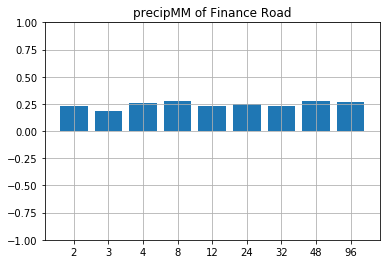

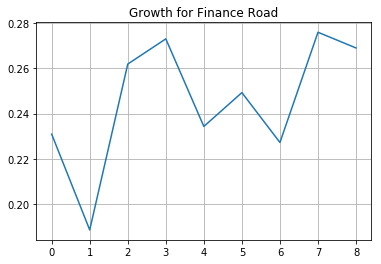

precipMM for Road: Gov. Forbes - Lacson
precipMM_Rmean=2 : 0.027504246771961997 : 71
precipMM_Rmean=3 : 0.032725641684461015 : 107
precipMM_Rmean=4 : 0.08002096056839955 : 143
precipMM_Rmean=8 : 0.028795695812008262 : 179
precipMM_Rmean=12 : 0.025067049471930874 : 215
precipMM_Rmean=24 : 0.00287796419576326 : 251
precipMM_Rmean=32 : 0.048339269395883566 : 287
precipMM_Rmean=48 : 0.06488699624093455 : 323
precipMM_Rmean=96 : -0.000101950252111384 : 359
Max for Road Gov. Forbes - Lacson:0.08002096056839955


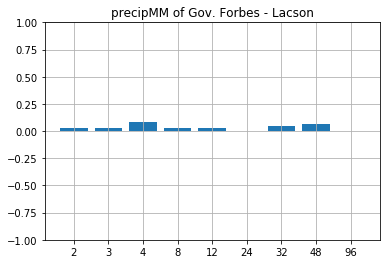

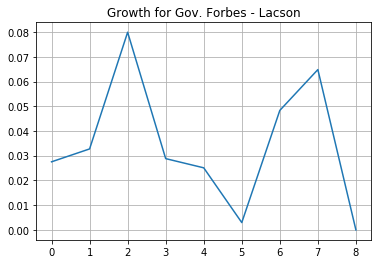

precipMM for Road: Lerma
precipMM_Rmean=2 : -0.02120229372176349 : 71
precipMM_Rmean=3 : -0.01915189538760055 : 107
precipMM_Rmean=4 : -0.03074832044594227 : 143
precipMM_Rmean=8 : -0.020994114979125046 : 179
precipMM_Rmean=12 : -0.03049216054460362 : 215
precipMM_Rmean=24 : -0.0014348279875629403 : 251
precipMM_Rmean=32 : 0.010246310246175429 : 287
precipMM_Rmean=48 : 0.022500446745030843 : 323
precipMM_Rmean=96 : -0.016454461537211106 : 359
Max for Road Lerma:0.03074832044594227


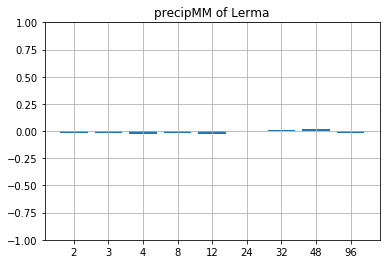

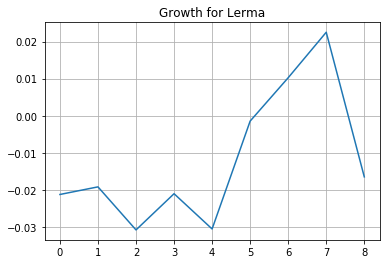

precipMM for Road: Magsaysay Ave
precipMM_Rmean=2 : -0.0006313835586757805 : 71
precipMM_Rmean=3 : 0.030405431335024387 : 107
precipMM_Rmean=4 : 0.06259554826703162 : 143
precipMM_Rmean=8 : 0.03779048369758961 : 179
precipMM_Rmean=12 : 0.014954507814362418 : 215
precipMM_Rmean=24 : 0.0056314723134869 : 251
precipMM_Rmean=32 : 0.009898752663446257 : 287
precipMM_Rmean=48 : -0.012549403767697842 : 323
precipMM_Rmean=96 : -0.05022683423293905 : 359
Max for Road Magsaysay Ave:0.06259554826703162


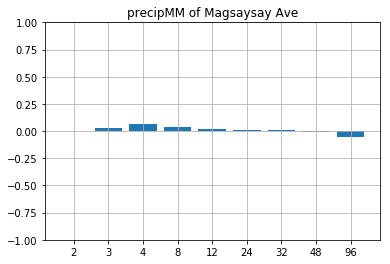

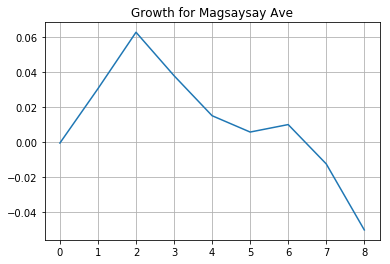

precipMM for Road: P.Noval
precipMM_Rmean=2 : -0.09196229760757786 : 71
precipMM_Rmean=3 : -0.07655852601514067 : 107
precipMM_Rmean=4 : -0.04424872941223303 : 143
precipMM_Rmean=8 : 0.020269776161110482 : 179
precipMM_Rmean=12 : -0.061495944489042324 : 215
precipMM_Rmean=24 : -0.008604406580893188 : 251
precipMM_Rmean=32 : -0.02925471484668508 : 287
precipMM_Rmean=48 : -0.028350171578767656 : 323
precipMM_Rmean=96 : -0.05004073329405275 : 359
Max for Road P.Noval:0.09196229760757786


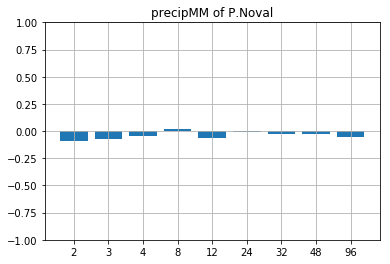

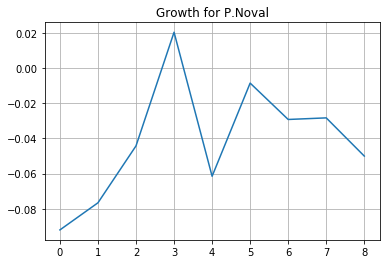

precipMM for Road: Pablo Ocampo
precipMM_Rmean=2 : -0.060861138532439164 : 71
precipMM_Rmean=3 : -0.08534953222677548 : 107
precipMM_Rmean=4 : -0.09150979626450413 : 143
precipMM_Rmean=8 : -0.1076267034750164 : 179
precipMM_Rmean=12 : -0.0869112270137509 : 215
precipMM_Rmean=24 : -0.09823504341496422 : 251
precipMM_Rmean=32 : -0.05173957880182379 : 287
precipMM_Rmean=48 : -0.0349061137278531 : 323
precipMM_Rmean=96 : -0.044151354371614486 : 359
Max for Road Pablo Ocampo:0.1076267034750164


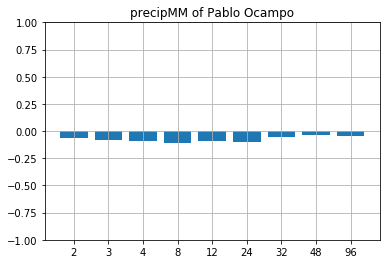

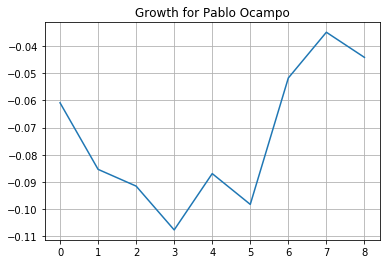

precipMM for Road: Pedro Gil
precipMM_Rmean=2 : -0.08580409005211273 : 71
precipMM_Rmean=3 : -0.08634206459475884 : 107
precipMM_Rmean=4 : -0.03303108167013172 : 143
precipMM_Rmean=8 : 0.07468404013051552 : 179
precipMM_Rmean=12 : -0.05496847481777139 : 215
precipMM_Rmean=24 : 0.006277436532769394 : 251
precipMM_Rmean=32 : -0.020038183475646003 : 287
precipMM_Rmean=48 : -0.023848123363632852 : 323
precipMM_Rmean=96 : -0.057368976595656325 : 359
Max for Road Pedro Gil:0.08634206459475884


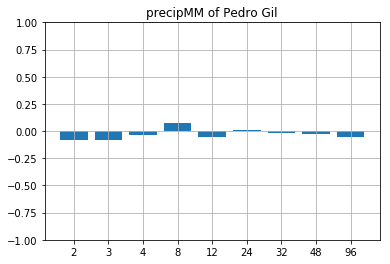

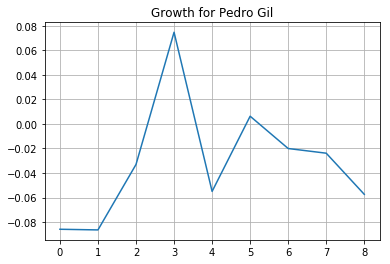

precipMM for Road: Quezon Ave.
precipMM_Rmean=2 : -0.08993876119825904 : 71
precipMM_Rmean=3 : -0.08992490367553417 : 107
precipMM_Rmean=4 : -0.08170882386255107 : 143
precipMM_Rmean=8 : -0.02796113434560586 : 179
precipMM_Rmean=12 : -0.07211358122821382 : 215
precipMM_Rmean=24 : -0.030000698605587062 : 251
precipMM_Rmean=32 : -0.04860643071122305 : 287
precipMM_Rmean=48 : -0.050908976606508206 : 323
precipMM_Rmean=96 : -0.048686780376585886 : 359
Max for Road Quezon Ave.:0.08993876119825904


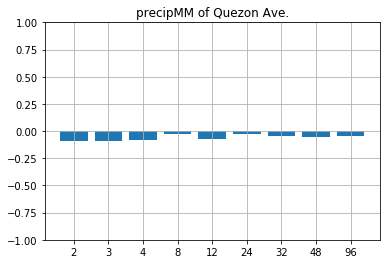

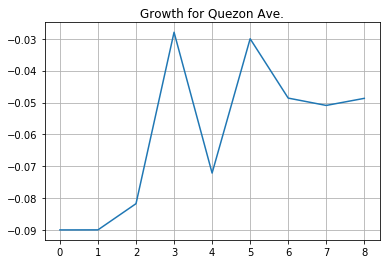

precipMM for Road: Quirino
precipMM_Rmean=2 : -0.07145124426755503 : 71
precipMM_Rmean=3 : -0.06465087598292851 : 107
precipMM_Rmean=4 : -0.02590673720472533 : 143
precipMM_Rmean=8 : -0.05200387951674722 : 179
precipMM_Rmean=12 : -0.06130368143382864 : 215
precipMM_Rmean=24 : -0.05657250672391442 : 251
precipMM_Rmean=32 : -0.03871141740283107 : 287
precipMM_Rmean=48 : -0.023633974153655514 : 323
precipMM_Rmean=96 : -0.0487667671302538 : 359
Max for Road Quirino:0.07145124426755503


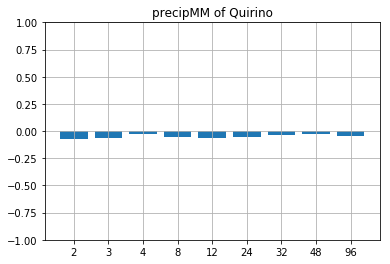

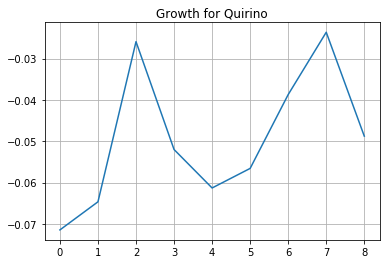

precipMM for Road: Rajah Sulayman
precipMM_Rmean=2 : 0.0008445210989221796 : 71
precipMM_Rmean=3 : 0.01976317671387869 : 107
precipMM_Rmean=4 : 0.03627324948286796 : 143
precipMM_Rmean=8 : -0.02234266557053604 : 179
precipMM_Rmean=12 : 0.028583731976068293 : 215
precipMM_Rmean=24 : 0.010422100410704795 : 251
precipMM_Rmean=32 : 0.022434961178092055 : 287
precipMM_Rmean=48 : 0.028336897650095057 : 323
precipMM_Rmean=96 : 0.013048880527453541 : 359
Max for Road Rajah Sulayman:0.03627324948286796


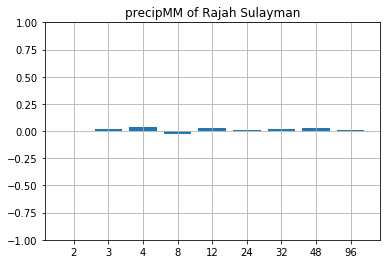

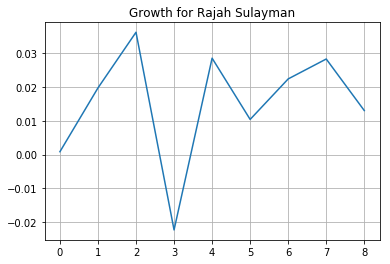

precipMM for Road: Taft Ave.
precipMM_Rmean=2 : -0.07258528797751154 : 71
precipMM_Rmean=3 : -0.052772091784633234 : 107
precipMM_Rmean=4 : -0.005232770406003615 : 143
precipMM_Rmean=8 : 0.015743796431701658 : 179
precipMM_Rmean=12 : -0.03846817860779336 : 215
precipMM_Rmean=24 : -0.009157330629687136 : 251
precipMM_Rmean=32 : -0.0280512981818016 : 287
precipMM_Rmean=48 : -0.022697066373664098 : 323
precipMM_Rmean=96 : -0.033919706130187376 : 359
Max for Road Taft Ave.:0.07258528797751154


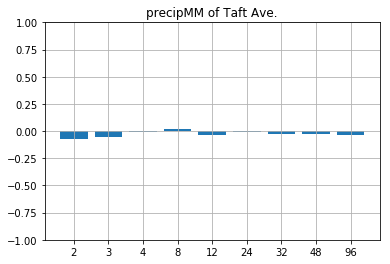

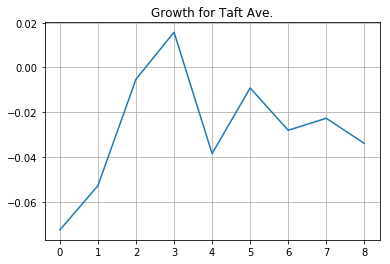

precipMM for Road: U.N. Avenue
precipMM_Rmean=2 : -0.2722230739794182 : 71
precipMM_Rmean=3 : -0.25861591401344786 : 107
precipMM_Rmean=4 : -0.1950707113881498 : 143
precipMM_Rmean=8 : -0.05102767345785236 : 179
precipMM_Rmean=12 : -0.2349579332472646 : 215
precipMM_Rmean=24 : -0.1288972231265922 : 251
precipMM_Rmean=32 : -0.18093749807655546 : 287
precipMM_Rmean=48 : -0.1880559251536249 : 323
precipMM_Rmean=96 : -0.22410918991654646 : 359
Max for Road U.N. Avenue:0.2722230739794182


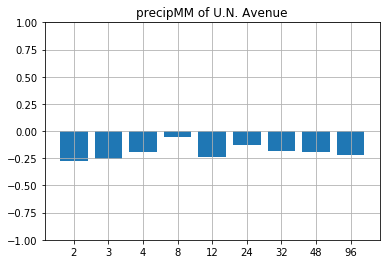

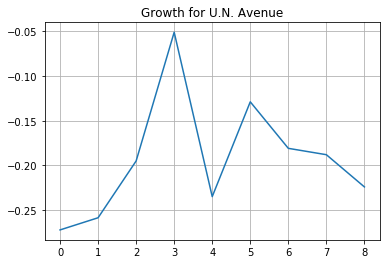

precipMM for Road: Vicente Cruz
precipMM_Rmean=2 : 0.0479356759976597 : 71
precipMM_Rmean=3 : 0.03710193819819161 : 107
precipMM_Rmean=4 : 0.09129448559714017 : 143
precipMM_Rmean=8 : 0.08570083390824254 : 179
precipMM_Rmean=12 : 0.04714885436701202 : 215
precipMM_Rmean=24 : 0.05944337258891527 : 251
precipMM_Rmean=32 : 0.09079896341249434 : 287
precipMM_Rmean=48 : 0.11263277825621655 : 323
precipMM_Rmean=96 : 0.052620427118757696 : 359
Max for Road Vicente Cruz:0.11263277825621655


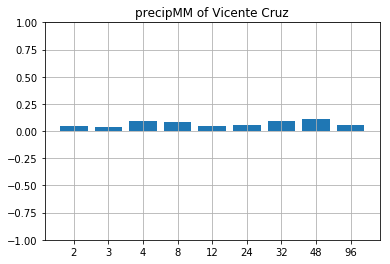

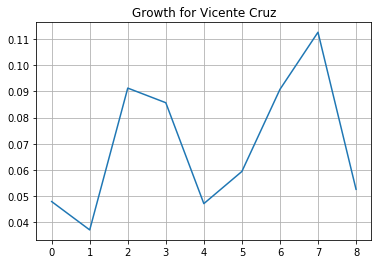

In [26]:
w = 0
r = 0
feature = 'precipMM'
y = []

for r in range(len(ROADS_1)):
    y = []
    print(feature + " for Road: " + ROADS_1[r])
    for w in range(len(WINDOWS)):
        for f in range(3, len(ROADS_NB_CR[r].columns)): 
            if f not in rMean[w]:
                continue
            elif feature not in ROADS_NB_CR[r].columns[f]:
                continue
            print(str(ROADS_NB_CR[r].columns[f]) + " : " + str(ROADS_NB_CR[r].iloc[0, f]) + " : " + str(f))
            y.append(ROADS_NB_CR[r].iloc[0, f])
            
    print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
    plt.bar(np.arange(len(WINDOWS)), y)
    plt.ylim(ymax=1, ymin=-1)
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.grid()
    plt.title(feature + " of " + ROADS_1[r])
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.title("Growth for " + ROADS_1[r])

    plt.show()